# **Análisis Exploratorio de Indicadores de Salud y Factores Asociados a la Diabetes en la Encuesta BRFSS 2015**

## **1. Contexto del dataset**m


La diabetes es una de las enfermedades crónicas más prevalentes en los Estados Unidos y representa un problema significativo de salud pública a nivel mundial. Se trata de una condición metabólica caracterizada por la incapacidad del organismo para regular adecuadamente los niveles de glucosa en sangre, ya sea por deficiencia en la producción de insulina o por resistencia a su acción. Esta alteración puede derivar en complicaciones graves como enfermedades cardiovasculares, insuficiencia renal, pérdida de visión y amputaciones, afectando considerablemente la calidad y esperanza de vida de los pacientes.

De acuerdo con los Centros para el Control y la Prevención de Enfermedades (CDC), millones de personas en Estados Unidos padecen diabetes o prediabetes, y una proporción significativa desconoce su condición. Esta situación incrementa el riesgo de complicaciones severas y genera una carga económica sustancial para el sistema de salud, con costos que ascienden a cientos de miles de millones de dólares anuales. La detección temprana y la identificación de factores de riesgo asociados son fundamentales para implementar estrategias preventivas y reducir el impacto clínico y económico de la enfermedad.

El presente analisis utiliza el conjunto de datos Behavioral Risk Factor Surveillance System (BRFSS) 2015, una encuesta telefónica anual realizada por el CDC que recopila información sobre condiciones crónicas, comportamientos de riesgo y acceso a servicios de salud en más de 400.000 individuos. Para este estudio se emplea una versión procesada del dataset que contiene 253.680 observaciones y 21 variables predictoras, donde la variable objetivo indica la presencia o ausencia de diabetes o prediabetes.


El análisis exploratorio de datos permitirá comprender la estructura del conjunto de datos, identificar patrones relevantes, evaluar posibles relaciones entre variables y detectar desequilibrios en la variable objetivo. Este proceso es fundamental para garantizar una modelación adecuada y para justificar el uso de técnicas avanzadas de validación y optimización de modelos en etapas posteriores del proyecto.

## **2. Objetivo del análisis**

Explorar y analizar visualmente la relación entre variables demográficas, hábitos de vida y condiciones de salud con la presencia de diabetes en la población adulta de Estados Unidos, utilizando el conjunto de datos BRFSS 2015.

### **2.1 Objetivos específicos**
- Describir la distribución de la variable objetivo (presencia o ausencia de diabetes).
- Analizar el comportamiento individual de las variables numéricas y categóricas del conjunto de datos.
- Identificar patrones visuales y posibles asociaciones entre factores de riesgo (como índice de masa corporal, presión arterial, consumo de alcohol, actividad física, entre otros) y la diabetes.
- Comparar grupos poblacionales según características como edad, educación, ingreso y sexo.
- Detectar tendencias, contrastes y relaciones relevantes que aporten comprensión al fenómeno estudiado.

## **3. Propósito del estudio**

El propósito de este análisis exploratorio es comprender cómo diferentes factores relacionados con el estilo de vida, la salud general y las características sociodemográficas se distribuyen en la población y cómo se asocian con la presencia de diabetes. A través de técnicas de visualización de datos, se busca identificar patrones significativos, contrastes entre grupos y posibles factores relevantes que contribuyan a una mejor interpretación del problema desde una perspectiva descriptiva.

## **4. Carga y estructura del dataset**

Para la realización del análisis exploratorio se emplea el lenguaje de programación Python junto con las librerías especializadas en análisis y visualización de datos. Inicialmente, se cargan las librerías necesarias para la manipulación, análisis estadístico y representación gráfica de la información.

Posteriormente, se importa el conjunto de datos BRFSS 2015 desde un archivo en formato CSV, permitiendo su almacenamiento en una estructura tipo DataFrame que facilita la exploración y análisis de las variables. Esta etapa permite verificar la correcta lectura del archivo, reconocer la organización de las columnas y preparar el entorno para las fases posteriores del análisis exploratorio.

In [ ]:
# Librerías importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Quitar mensajes de advertencia
import warnings
warnings.filterwarnings("ignore")

# Configuración estética
sns.set_theme(style="whitegrid")

df = pd.read_csv(r"C:\Users\danih\Documents\Dataviz_py\diabetes_binary_health_indicators_BRFSS2015.csv", index_col=None)

### **4.1 Visualización inicial de los datos**

In [50]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [51]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


### **4.2 Dimensiones**

In [41]:
df.shape

(253680, 22)

In [42]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

El conjunto de datos presenta un total de **253.680 observaciones (filas)** y **22 variables (columnas)**. Cada fila representa un individuo encuestado dentro del sistema BRFSS 2015, mientras que las columnas corresponden a distintos indicadores relacionados con condiciones médicas, hábitos de vida, características sociodemográficas y estado general de salud.

El tamaño del dataset resulta considerablemente amplio, lo que permite realizar un análisis exploratorio robusto y facilita la identificación de patrones y tendencias dentro de la población estudiada. Asimismo, la cantidad de variables disponibles proporciona una visión multidimensional de los factores asociados a la salud, permitiendo analizar diferentes aspectos del bienestar físico y conductual de los individuos.

### **4.3 Estructura**

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Aunque todas las variables se encuentran almacenadas como valores numéricos, es importante destacar que varias de ellas representan **variables categóricas binarias u ordinales codificadas numéricamente**. Esta codificación facilita el análisis estadístico y la visualización, pero requiere una interpretación adecuada según el significado conceptual de cada variable.

### **4.4 Clasificación de variables**

Aunque `df.info()` muestra que la mayoría de columnas están almacenadas como valores numéricos, esto no significa que todas deban interpretarse como variables numéricas continuas. En este conjunto de datos, varias columnas representan respuestas categóricas binarias codificadas como 0/1 (por ejemplo, Smoker, HighBP, Stroke), mientras que otras representan escalas ordinales (por ejemplo, GenHlth, Education, Income, Age), donde el orden de los valores tiene significado pero no necesariamente una distancia numérica “real” entre categorías.

Para fines de visualización y análisis exploratorio, clasificamos las variables según su naturaleza conceptual y las convertimos a su tipo adecuado, esto para mejorar la interpretación de gráficos, facilitar cálculos descriptivos y evitar tratamientos incorrectos (por ejemplo, interpretar un 0/1 como una variable continua)Aunque muchas variables aparecen como numéricas (int64), varias de ellas representan categorías binarias (0/1), por lo que conceptualmente son variables categóricas.

#### **4.4.2 Definir variables numéricas, binarias y ordinales**

Se realiza una clasificación conceptual en tres grupos: variables numéricas (magnitud), ordinales (escala ordenada) y binarias (presencia/ausencia). Esta distinción mejora la selección de gráficos y evita interpretaciones incorrectas.

In [ ]:
Objetivo = "Diabetes_binary"


binary_cols = []
for col in df.columns:
    unique_vals = set(df[col].dropna().unique())
    if unique_vals.issubset({0, 1, 0.0, 1.0}) and len(unique_vals) <= 2:
        binary_cols.append(col)
        
# Binarias conceptuales: detectadas automáticamente, excluyendo target
binary_feature_cols = [c for c in binary_cols if c != Objetivo]

numeric_cols = ["BMI", "MentHlth", "PhysHlth"]
ordinal_cols = ["GenHlth", "Age", "Education", "Income"]



# Validación rápida
print("Objetivo:", Objetivo)
print("Numéricas:", numeric_cols)
print("Ordinales:", ordinal_cols)
print("Binarias:", binary_feature_cols)

Objetivo: Diabetes_binary
Numéricas: ['BMI', 'MentHlth', 'PhysHlth']
Ordinales: ['GenHlth', 'Age', 'Education', 'Income']
Binarias: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


#### **4.4.3 Conversión de los tipos**

Con el fin de garantizar coherencia semántica y mejorar la interpretabilidad de las visualizaciones, se realizó una reclasificación conceptual de las variables en una copia del dataset (`df_viz`). Las variables binarias fueron transformadas en categorías con etiquetas descriptivas completas (por ejemplo, “Con hipertensión” / “Sin hipertensión”), evitando el uso genérico de “Sí/No”.

Las variables ordinales (GenHlth, Age, Education e Income) fueron convertidas a categorías ordenadas, preservando su jerarquía natural. Además, los códigos correspondientes a respuestas faltantes o no informadas (por ejemplo, 77 y 99 en Income, 99 en Age) fueron tratados explícitamente como valores perdidos (NA).

Esta transformación no altera la información original, sino que optimiza la claridad analítica y la calidad de las representaciones gráficas, facilitando una interpretación más precisa de los patrones observados en el análisis exploratorio.

In [ ]:

df_viz = df.copy()  #copiamos el trabajo para no tocar el df original


# 1. Variable objetivo
df_viz["Diabetes_binary"] = df_viz["Diabetes_binary"].map({
    0: "Sin diabetes",
    1: "Prediabetes / Diabetes"
}).astype("category")



# 2. Variables binarias médicas y comportamentales
binary_mappings = {

    "HighBP": {0: "Sin hipertensión", 1: "Con hipertensión"},
    "HighChol": {0: "Sin colesterol alto", 1: "Con colesterol alto"},
    "CholCheck": {0: "Sin chequeo en 5 años", 1: "Con chequeo en 5 años"},
    "Smoker": {0: "No fumador", 1: "Fumador"},
    "Stroke": {0: "Sin ACV", 1: "Con ACV"},
    "HeartDiseaseorAttack": {0: "Sin enfermedad cardíaca", 1: "Con enfermedad cardíaca"},
    "PhysActivity": {0: "Sin actividad física", 1: "Con actividad física"},
    "Fruits": {0: "No consume frutas diario", 1: "Consume frutas diario"},
    "Veggies": {0: "No consume verduras diario", 1: "Consume verduras diario"},
    "HvyAlcoholConsump": {0: "No consumo alto alcohol", 1: "Consumo alto alcohol"},
    "AnyHealthcare": {0: "Sin cobertura médica", 1: "Con cobertura médica"},
    "NoDocbcCost": {0: "Sin barrera económica", 1: "Con barrera económica"},
    "DiffWalk": {0: "Sin dificultad al caminar", 1: "Con dificultad al caminar"},
    "Sex": {0: "Mujer", 1: "Hombre"}
}

for col, mapping in binary_mappings.items():
    df_viz[col] = df_viz[col].map(mapping).astype("category")


# VARIABLES ESPECIALES:

# 3. GenHlth (ordinal 1–5)
df_viz["GenHlth"] = df_viz["GenHlth"].map({
    1: "Excelente",
    2: "Muy buena",
    3: "Buena",
    4: "Regular",
    5: "Mala"
}).astype("category")

df_viz["GenHlth"] = df_viz["GenHlth"].cat.reorder_categories(
    ["Excelente", "Muy buena", "Buena", "Regular", "Mala"],
    ordered=True
)


# 4. Age (1–13, 99 = Missing)
df_viz["Age"] = df_viz["Age"].replace(99, pd.NA)

age_mapping = {
    1: "18–24",
    2: "25–29",
    3: "30–34",
    4: "35–39",
    5: "40–44",
    6: "45–49",
    7: "50–54",
    8: "55–59",
    9: "60–64",
    10: "65–69",
    11: "70–74",
    12: "75–79",
    13: "80+"
}

df_viz["Age"] = df_viz["Age"].map(age_mapping).astype("category")

df_viz["Age"] = df_viz["Age"].cat.reorder_categories(
    list(age_mapping.values()),
    ordered=True
)

# 5. Education (1–6)
education_mapping = {
    1: "Nunca asistió",
    2: "Primaria incompleta",
    3: "Secundaria incompleta",
    4: "Secundaria completa / GED",
    5: "Universidad incompleta",
    6: "Universidad completa"
}

df_viz["Education"] = df_viz["Education"].map(education_mapping).astype("category")

df_viz["Education"] = df_viz["Education"].cat.reorder_categories(
    list(education_mapping.values()),
    ordered=True
)


# 7. Income (1–8, 77 y 99 = Missing)
df_viz["Income"] = df_viz["Income"].replace({77: pd.NA, 99: pd.NA})

income_mapping = {
    1: "< $10,000",
    2: "$10,000–15,000",
    3: "$15,000–20,000",
    4: "$20,000–25,000",
    5: "$25,000–35,000",
    6: "$35,000–50,000",
    7: "$50,000–75,000",
    8: "$75,000+"
}

df_viz["Income"] = df_viz["Income"].map(income_mapping).astype("category")

df_viz["Income"] = df_viz["Income"].cat.reorder_categories(
    list(income_mapping.values()),
    ordered=True
)


# Verificación final
df_viz.info()

#Para probar una en particular
df_viz["Sex"].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   HeartDiseaseorAttack  253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

CategoricalDtype(categories=['Hombre', 'Mujer'], ordered=False, categories_dtype=object)

#### **4.4.4 Diccionario de datos/Operacionalización de las variables**

Con el fin de documentar el conjunto de datos y facilitar la interpretación de las visualizaciones, se construyó un diccionario de datos que resume para cada variable su rol (objetivo o característica), su tipo conceptual (binaria, numérica u ordinal), su codificación y una breve descripción basada en el codebook del BRFSS.


In [60]:
data_dictionary = [

    # Target
    {"Variable": "Diabetes_binary",
     "Rol": "Target",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Sin diabetes / Prediabetes–Diabetes",
     "Descripción": "Indicador de presencia de diabetes o prediabetes"},

    # Binarias médicas y comportamentales
    {"Variable": "HighBP",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Sin hipertensión / Con hipertensión",
     "Descripción": "Diagnóstico de hipertensión arterial"},

    {"Variable": "HighChol",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Sin colesterol alto / Con colesterol alto",
     "Descripción": "Diagnóstico de colesterol elevado"},

    {"Variable": "CholCheck",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Sin chequeo en 5 años / Con chequeo en 5 años",
     "Descripción": "Realizó chequeo de colesterol en los últimos 5 años"},

    {"Variable": "Smoker",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "No fumador / Fumador",
     "Descripción": "Ha fumado al menos 100 cigarrillos en su vida"},

    {"Variable": "Stroke",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Sin ACV / Con ACV",
     "Descripción": "Antecedente de accidente cerebrovascular"},

    {"Variable": "HeartDiseaseorAttack",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Sin enfermedad cardíaca / Con enfermedad cardíaca",
     "Descripción": "Diagnóstico de enfermedad coronaria o infarto"},

    {"Variable": "PhysActivity",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Sin actividad física / Con actividad física",
     "Descripción": "Actividad física en los últimos 30 días (excluye trabajo)"},

    {"Variable": "Fruits",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "No consume frutas diario / Consume frutas diario",
     "Descripción": "Consumo diario de frutas"},

    {"Variable": "Veggies",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "No consume verduras diario / Consume verduras diario",
     "Descripción": "Consumo diario de verduras"},

    {"Variable": "HvyAlcoholConsump",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "No consumo alto alcohol / Consumo alto alcohol",
     "Descripción": "Consumo elevado de alcohol según criterio BRFSS"},

    {"Variable": "AnyHealthcare",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Sin cobertura médica / Con cobertura médica",
     "Descripción": "Cuenta con seguro o cobertura médica"},

    {"Variable": "NoDocbcCost",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Sin barrera económica / Con barrera económica",
     "Descripción": "No pudo consultar médico por razones económicas"},

    {"Variable": "DiffWalk",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Sin dificultad al caminar / Con dificultad al caminar",
     "Descripción": "Dificultad para caminar o subir escaleras"},

    {"Variable": "Sex",
     "Rol": "Feature",
     "Tipo": "Binaria (categórica)",
     "Codificación": "Mujer / Hombre",
     "Descripción": "Sexo biológico del encuestado"},


    # Numéricas reales
    {"Variable": "BMI",
     "Rol": "Feature",
     "Tipo": "Numérica continua",
     "Codificación": "Valor numérico",
     "Descripción": "Índice de Masa Corporal"},

    {"Variable": "MentHlth",
     "Rol": "Feature",
     "Tipo": "Numérica discreta",
     "Codificación": "0–30 días",
     "Descripción": "Número de días con mala salud mental en los últimos 30 días"},

    {"Variable": "PhysHlth",
     "Rol": "Feature",
     "Tipo": "Numérica discreta",
     "Codificación": "0–30 días",
     "Descripción": "Número de días con mala salud física en los últimos 30 días"},


    # Ordinales
    {"Variable": "GenHlth",
     "Rol": "Feature",
     "Tipo": "Ordinal (categórica ordenada)",
     "Codificación": "Excelente / Muy buena / Buena / Regular / Mala",
     "Descripción": "Autopercepción del estado general de salud"},

    {"Variable": "Age",
     "Rol": "Feature",
     "Tipo": "Ordinal (categórica ordenada)",
     "Codificación": "18–24 … 80+",
     "Descripción": "Categoría de edad (13 grupos ordenados)"},

    {"Variable": "Education",
     "Rol": "Feature",
     "Tipo": "Ordinal (categórica ordenada)",
     "Codificación": "Nunca asistió … Universidad completa",
     "Descripción": "Nivel educativo del encuestado"},

    {"Variable": "Income",
     "Rol": "Feature",
     "Tipo": "Ordinal (categórica ordenada)",
     "Codificación": "< $10,000 … $75,000+",
     "Descripción": "Categoría de ingresos anuales del hogar"}
]

dic_df = pd.DataFrame(data_dictionary)

dic_df.style \
    .hide(axis="index") \
    .set_properties(**{"text-align": "left"}) \
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "left"), ("font-weight", "bold")]}
    ])

Variable,Rol,Tipo,Codificación,Descripción
Diabetes_binary,Target,Binaria (categórica),Sin diabetes / Prediabetes–Diabetes,Indicador de presencia de diabetes o prediabetes
HighBP,Feature,Binaria (categórica),Sin hipertensión / Con hipertensión,Diagnóstico de hipertensión arterial
HighChol,Feature,Binaria (categórica),Sin colesterol alto / Con colesterol alto,Diagnóstico de colesterol elevado
CholCheck,Feature,Binaria (categórica),Sin chequeo en 5 años / Con chequeo en 5 años,Realizó chequeo de colesterol en los últimos 5 años
Smoker,Feature,Binaria (categórica),No fumador / Fumador,Ha fumado al menos 100 cigarrillos en su vida
Stroke,Feature,Binaria (categórica),Sin ACV / Con ACV,Antecedente de accidente cerebrovascular
HeartDiseaseorAttack,Feature,Binaria (categórica),Sin enfermedad cardíaca / Con enfermedad cardíaca,Diagnóstico de enfermedad coronaria o infarto
PhysActivity,Feature,Binaria (categórica),Sin actividad física / Con actividad física,Actividad física en los últimos 30 días (excluye trabajo)
Fruits,Feature,Binaria (categórica),No consume frutas diario / Consume frutas diario,Consumo diario de frutas
Veggies,Feature,Binaria (categórica),No consume verduras diario / Consume verduras diario,Consumo diario de verduras


## **5. Limpieza y Verificación de Calidad de los Datos**

Antes de proceder con el análisis descriptivo y las visualizaciones, es fundamental verificar la calidad del conjunto de datos. Esta etapa permite identificar posibles inconsistencias, valores faltantes, duplicaciones o errores en los rangos de las variables, garantizando que los resultados posteriores sean confiables y correctamente interpretados.

### **5.1 Identificación de valores faltantes**

In [11]:
# Conteo absoluto de valores faltantes
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# Porcentaje de valores faltantes
(df.isnull().mean() * 100).round(4)

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

Se realizó una verificación de valores faltantes mediante el método `isnull()`. Los resultados muestran que ninguna variable presenta valores nulos, lo cual indica que el conjunto de datos se encuentra completo y no requiere imputación ni eliminación de registros por este motivo.

### **5.2 Revisión de registros duplicados**

In [13]:
duplicados = df.duplicated().sum()
duplicados

24206

In [14]:
df[df.duplicated()]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [15]:
total_filas = len(df_viz)
propor_dupli = (duplicados/total_filas)*100
propor_dupli

9.541942604856512

**NOTA:** La verificación de registros duplicados identificó 24.206 observaciones completamente idénticas, lo que representa aproximadamente el 9.5% del total de registros. Sin embargo, dado que el dataset contiene un identificador único por individuo (ID), el cual fue excluido al importar los datos, y que se trata de datos provenientes de una encuesta poblacional con variables mayoritariamente categóricas y discretas, es plausible que múltiples individuos compartan exactamente el mismo patrón de respuestas. Por lo tanto, estos registros no se consideran errores estructurales y no fueron eliminados del análisis, ya que representan individuos distintos con características similares.

### **5.3 Verificación de rangos esperados**

#### **5.3.1 Variables binarias**

Estas deberían contener exclusivamente valores 0 y 1.

In [ ]:
# Acá se verifica si los datos no tienen valores diferentes a su categoría
binary_cols_original = binary_cols #tambien se puede utilizar binary_mappings

for col in binary_cols_original:
    print(col, sorted(df[col].unique()))

HighBP [0.0, 1.0]
HighChol [0.0, 1.0]
CholCheck [0.0, 1.0]
Smoker [0.0, 1.0]
Stroke [0.0, 1.0]
HeartDiseaseorAttack [0.0, 1.0]
PhysActivity [0.0, 1.0]
Fruits [0.0, 1.0]
Veggies [0.0, 1.0]
HvyAlcoholConsump [0.0, 1.0]
AnyHealthcare [0.0, 1.0]
NoDocbcCost [0.0, 1.0]
DiffWalk [0.0, 1.0]
Sex [0.0, 1.0]


Se verificó que las variables binarias únicamente contuvieran valores dentro del rango esperado {0, 1}. No se encontraron valores fuera de esta codificación, lo que confirma la consistencia de las variables dicotómicas.

#### **5.3.2 Variables ordinales**

In [63]:
ordinal_ranges = {
    "GenHlth": (1, 5),
    "Education": (1, 6),
    "Income": (1, 8),
    "Age": (1, 13)
}

for col, (min_val, max_val) in ordinal_ranges.items():
    print(col, "min:", df[col].min(), "max:", df[col].max())

GenHlth min: 1.0 max: 5.0
Education min: 1.0 max: 6.0
Income min: 1.0 max: 8.0
Age min: 1.0 max: 13.0


Las variables ordinales fueron verificadas para asegurar que sus valores se encuentren dentro de los rangos definidos por el instrumento BRFSS. Los valores mínimos y máximos observados coinciden con los límites esperados, por lo que no se detectaron inconsistencias.

#### **5.3.3 Variables numéricas**

In [67]:
df[numeric_cols].mean()

# Resumen descriptivo  de edad según la suscripcion solo una variable
numeric_check = df[numeric_cols].agg([
    'min',
    'max'
]).round(2)

# Calcular rango explícitamente
numeric_check.loc["rango"] = (
    numeric_check.loc["max"] - numeric_check.loc["min"]
)

# Renombrar filas
numeric_check.index = [
    "Mínimo",
    "Máximo",
    "Rango"
]



numeric_check

,BMI,MentHlth,PhysHlth
Mínimo,12.0,0.0,0.0
Máximo,98.0,30.0,30.0
Rango,86.0,30.0,30.0


Se realizó una verificación de rangos esperados para las variables numéricas continuas y discretas. Se analizaron los valores mínimo y máximo, así como el rango observado. Los resultados confirman que las variables BMI, MentHlth y PhysHlth se encuentran dentro de los límites teóricamente esperados (BMI: 12–98; salud física y mental: 0–30 días), sin evidencia de valores fuera de dominio.

En conjunto, el dataset presenta una alta calidad estructural: no se identificaron valores faltantes, duplicados ni inconsistencias en los rangos esperados de las variables. Esto permite proceder con el análisis exploratorio con un alto grado de confianza en la integridad de la información.

## **6. Resumen estadístico**

In [30]:
# descriptivo edad según la suscripcion varias variable
df[numeric_cols].mean()

# Resumen descriptivo  de edad según la suscripcion solo una variable
var_num_cat = df[numeric_cols].agg([
    'mean',
    'std',
    'min',
    'max',
    'median',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75)
]).round(2)

# Renombrar filas
var_num_cat.index = [
    "Media",
    "Desviación estándar",
    "Mínimo",
    "Máximo",
    "Mediana",
    "Percentil 25%",
    "Percentil 75%"
]

var_num_cat

,BMI,MentHlth,PhysHlth
Media,28.38,3.18,4.24
Desviación estándar,6.61,7.41,8.72
Mínimo,12.00,0.00,0.00
Máximo,98.00,30.00,30.00
Mediana,27.00,0.00,0.00
Percentil 25%,24.00,0.00,0.00
Percentil 75%,31.00,2.00,3.00


El Índice de Masa Corporal `BMI` presenta una media de 28.38 y una mediana de 27.00, lo que sugiere una ligera asimetría positiva. El rango observado (12.00 – 98.00) indica una amplitud considerable, con presencia de valores elevados que pueden influir en la media. El percentil 25 (24.00) y el percentil 75 (31.00) muestran que el 50% central de la población se encuentra dentro de un intervalo relativamente concentrado, lo que sugiere variabilidad moderada.

En el caso de `MentHlth` (días de mala salud mental), la media es 3.18 días, mientras que la mediana es 0.00 días. Este contraste indica que más de la mitad de los individuos no reportaron días de mala salud mental en los últimos 30 días, pero existe un subconjunto que sí reporta valores altos, generando una distribución asimétrica hacia la derecha.

De manera similar, `PhysHlth` presenta una media de 4.24 días y una mediana de 0.00 días. La diferencia entre media y mediana evidencia también una fuerte asimetría positiva, con concentración de valores en cero y presencia de casos con múltiples días reportados.

En conjunto, las variables de salud física y mental muestran distribuciones altamente concentradas en cero, con colas hacia valores superiores, mientras que el BMI presenta mayor dispersión y variabilidad continua.

### **6.1 Asimetría y curtosis**

In [68]:
skew_kurt = df[numeric_cols].agg([
    "skew",
    "kurt"
]).round(2)

skew_kurt.index = ["Asimetría", "Curtosis"]

skew_kurt

,BMI,MentHlth,PhysHlth
Asimetría,2.12,2.72,2.21
Curtosis,11.00,6.44,3.50


Todas las variables presentan asimetría positiva considerable (valores mayores a 2), lo que indica que sus distribuciones se encuentran sesgadas hacia la derecha. Esto significa que existe una concentración elevada de observaciones en valores bajos, acompañada de una cola extendida hacia valores superiores. Este patrón es particularmente evidente en MentHlth (2.72), lo que confirma la fuerte acumulación de individuos que reportan cero días de mala salud mental, junto con un subconjunto más reducido que reporta valores altos.

En el caso de BMI (2.12), la asimetría positiva sugiere la presencia de valores elevados que desplazan la media por encima de la mediana, lo cual es coherente con la amplitud observada en el rango y con la posible existencia de individuos con obesidad severa.

Respecto a la curtosis, los valores obtenidos indican que las tres variables presentan distribuciones leptocúrticas (curtosis > 0 bajo definición de Fisher utilizada por pandas), especialmente BMI (11.00). Esto implica que las distribuciones tienen colas pesadas y mayor concentración de valores extremos en comparación con una distribución normal. MentHlth (6.44) y PhysHlth (3.50) también muestran colas pronunciadas, aunque en menor medida.

En conjunto, estos resultados confirman que ninguna de las variables numéricas sigue una distribución aproximadamente normal. Las distribuciones se caracterizan por alta concentración en valores bajos y presencia de observaciones extremas, lo que justifica el uso de visualizaciones robustas (como histogramas y diagramas de caja) y medidas basadas en percentiles para el análisis posterior.

## **7. Análisis univariado**

El análisis univariado tiene como objetivo examinar cada variable de manera individual para comprender su distribución, comportamiento y características principales. En esta sección se describen medidas de tendencia central, dispersión y forma en variables numéricas, así como frecuencias y proporciones en variables categóricas. Este análisis permite identificar posibles valores atípicos, asimetrías, patrones dominantes y calidad de los datos, constituyendo la base para interpretaciones posteriores y para la construcción del análisis bivariado y multivariado.

### **7.1. Variables demográficas**m

#### **7.1.1. Sexo**

In [288]:
var_cat = df_viz["Sex"].agg([
    "count"
])

frecuencias = df_viz["Sex"].value_counts()

porcentajes = df_viz["Sex"].value_counts(normalize=True) * 100

tabla_sex = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_sex


,Frecuencia,Porcentaje (%)
Sex,,
Mujer,141974,55.97
Hombre,111706,44.03


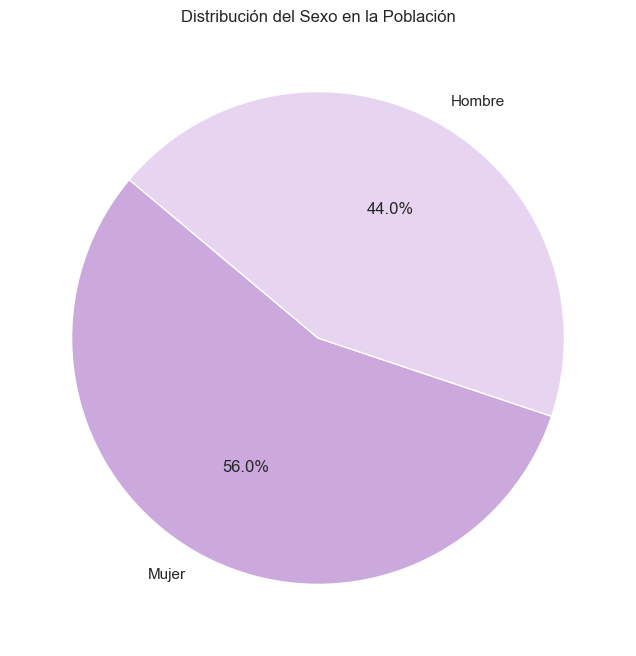

In [287]:
# Conteo de la variable Sex
sex_counts = df['Sex'].value_counts()

# Gráfico circular
plt.figure(figsize=(8,8))
plt.pie(sex_counts, labels=["Mujer", "Hombre"], autopct='%1.1f%%', startangle=140, colors=["#CCA9DD", "#E6D4F0"])
plt.title("Distribución del Sexo en la Población")

plt.show()

La tabla de frecuencias muestra la distribución de la variable Sex en la población analizada. Se observa que el 55.97% (n = 14,197) de los registros corresponde a mujeres, mientras que el 44.03% (n = 11,706) pertenece a hombres.

Estos resultados indican que la muestra presenta una ligera mayor representación de mujeres frente a los hombres. En términos generales, la distribución no es extremadamente desbalanceada, aunque sí existe una diferencia aproximada de 12 puntos porcentuales entre ambas categorías.

#### **7.1.2. Edad**

In [290]:
intervalos = {
    1: "18–24",
    2: "25–29",
    3: "30–34",
    4: "35–39",
    5: "40–44",
    6: "45–49",
    7: "50–54",
    8: "55–59",
    9: "60–64",
    10: "65–69",
    11: "70–74",
    12: "75–79",
    13: "80+"
}

tabla_age = df["Age"].value_counts().sort_index().reset_index()
tabla_age.columns = ["Código", "N"]

tabla_age["Intervalo de Edad"] = tabla_age["Código"].map(intervalos)

tabla_age["%"] = (tabla_age["N"] / tabla_age["N"].sum() * 100).round(2)

tabla_age = tabla_age[["Código", "Intervalo de Edad", "N", "%"]]

tabla_age

,Código,Intervalo de Edad,N,%
0,1.0,18–24,5700,2.25
1,2.0,25–29,7598,3.00
2,3.0,30–34,11123,4.38
3,4.0,35–39,13823,5.45
4,5.0,40–44,16157,6.37
5,6.0,45–49,19819,7.81
6,7.0,50–54,26314,10.37
7,8.0,55–59,30832,12.15
8,9.0,60–64,33244,13.10
9,10.0,65–69,32194,12.69


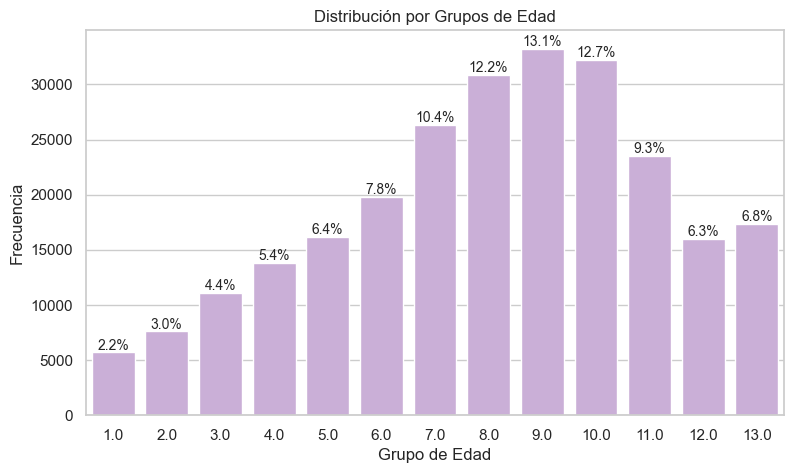

In [291]:
plt.figure(figsize=(9,5))

ax = sns.countplot(x='Age', data=df, color="#CCA9DD", order=sorted(df['Age'].unique()))

total = len(df)

# Agregar porcentajes
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        percentage,
        (x, y),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Distribución por Grupos de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Frecuencia")

plt.show()

La distribución etaria evidencia una concentración progresiva de la muestra en los grupos de edad media y tardía. Se observa que los intervalos comprendidos entre 50 y 69 años (códigos 7 a 10) acumulan aproximadamente el 48.31% del total de observaciones, con un pico específico en el grupo 60–64 años (13.10%), seguido por el grupo 65–69 años (12.69%) y 55–59 años (12.15%).

Este patrón indica una clara sobrerrepresentación de población en etapas de madurez y transición hacia la vejez, mientras que los grupos jóvenes (18–34 años) presentan una participación relativa considerablemente menor (aprox. 9.63% acumulado).

### **7.2. Variables socioeconómicas y acceso a la salud**

#### **7.2.1. Educación**

In [ ]:
educacion_cat = {
    1: "Nunca asistió",
    2: "Primaria incompleta",
    3: "Secundaria incompleta",
    4: "Secundaria completa / GED",
    5: "Universidad incompleta",
    6: "Universidad completa"
}

tabla_edu = df["Education"].value_counts().sort_index().reset_index()
tabla_edu.columns = ["Código", "N"]

tabla_edu["Categoría"] = tabla_edu["Código"].map(educacion_cat)

tabla_edu["%"] = (tabla_edu["N"] / tabla_edu["N"].sum() * 100).round(2)

tabla_edu = tabla_edu[["Código", "Categoría", "N", "%"]]

tabla_edu

,Código,Categoría,N,%
0,1.0,Nunca asistió,174,0.07
1,2.0,Primaria incompleta,4043,1.59
2,3.0,Secundaria incompleta,9478,3.74
3,4.0,Secundaria completa / GED,62750,24.74
4,5.0,Universidad incompleta,69910,27.56
5,6.0,Universidad completa,107325,42.31


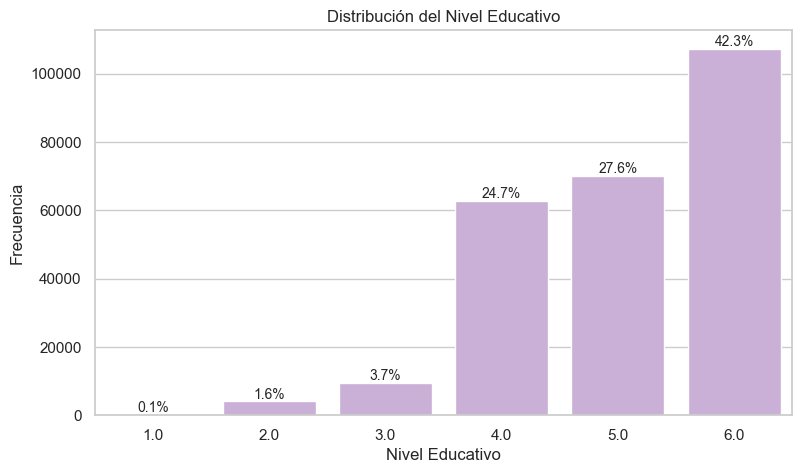

In [292]:
plt.figure(figsize=(9,5))

ax=sns.countplot(
    x='Education',
    data=df,
    color="#CCA9DD",
    order=sorted(df['Education'].unique())
)

# Agregar porcentajes
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        percentage,
        (x, y),
        ha='center',
        va='bottom',
        fontsize=10
    )


plt.title("Distribución del Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Frecuencia")

plt.show()

La distribución del nivel educativo evidencia una marcada concentración de la población en niveles de escolaridad media y superior. El grupo con mayor representación corresponde a los graduados universitarios, que constituyen el 42.31% (n = 107,325) de la muestra, seguido por quienes reportan algo de educación universitaria o formación técnica, con un 27.56% (n = 69,910). En conjunto, estas dos categorías agrupan cerca del 70% de los individuos, lo que indica un perfil educativo predominantemente alto dentro del dataset.

El nivel de graduado de secundaria representa el 24.74%, consolidando la mayor parte de la población en niveles educativos al menos completos en educación media. En contraste, los niveles educativos bajos presentan una participación marginal: los individuos con escolaridad inferior a secundaria (categorías 1 a 3) suman menos del 6% del total, evidenciando una subrepresentación relativa de poblaciones con baja escolaridad.

#### **7.2.2. Ingresos**

In [294]:
income_cat = {
    1: "Menos de $10,000",
    2: "$10,000–$14,999",
    3: "$15,000–$19,999",
    4: "$20,000–$24,999",
    5: "$25,000–$34,999",
    6: "$35,000–$49,999",
    7: "$50,000–$74,999",
    8: "$75,000 o más"
}

tabla_income = df["Income"].value_counts().sort_index().reset_index()
tabla_income.columns = ["Código", "N"]

tabla_income["Categoría"] = tabla_income["Código"].map(income_cat)

tabla_income["%"] = (tabla_income["N"] / tabla_income["N"].sum() * 100).round(2)

tabla_income = tabla_income[["Código", "Categoría", "N", "%"]]

tabla_income

,Código,Categoría,N,%
0,1.0,"Menos de $10,000",9811,3.87
1,2.0,"$10,000–$14,999",11783,4.64
2,3.0,"$15,000–$19,999",15994,6.30
3,4.0,"$20,000–$24,999",20135,7.94
4,5.0,"$25,000–$34,999",25883,10.20
5,6.0,"$35,000–$49,999",36470,14.38
6,7.0,"$50,000–$74,999",43219,17.04
7,8.0,"$75,000 o más",90385,35.63


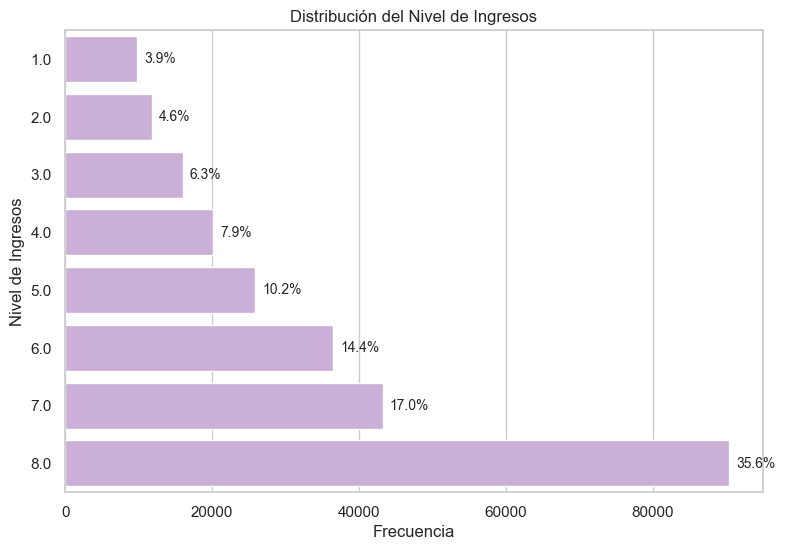

In [295]:
plt.figure(figsize=(9,6))

ax = sns.countplot(
    y='Income',
    data=df,
    color="#CCA9DD",
    order=sorted(df['Income'].unique())
)

# Total de observaciones
total = len(df)

# Agregar porcentajes
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%'
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    ax.annotate(
        percentage,
        (x, y),
        ha='left',
        va='center',
        fontsize=10,
        xytext=(5, 0),
        textcoords='offset points'
    )

plt.title("Distribución del Nivel de Ingresos")
plt.xlabel("Frecuencia")
plt.ylabel("Nivel de Ingresos")

plt.show()

La distribución del nivel de ingresos evidencia una clara concentración de la población en los estratos económicos medios y altos. El grupo más representativo corresponde a individuos con ingresos anuales de $75,000 o más, que constituyen el 35.63% (n = 90,385) del total de la muestra, seguido por el rango de $50,000–$74,999, con un 17.04%. En conjunto, estos dos niveles agrupan más de la mitad de las observaciones, indicando una predominancia de hogares con ingresos relativamente elevados dentro del dataset.

Los niveles intermedios de ingreso ($25,000–$49,999) presentan participaciones moderadas, mientras que los estratos de ingresos bajos (menos de $20,000 anuales) representan una proporción considerablemente menor, acumulando menos del 13% de la muestra. Este patrón sugiere una distribución socioeconómica desplazada hacia niveles superiores de ingreso, evidenciando una posible subrepresentación relativa de poblaciones económicamente vulnerables.

#### **7.2.3. Acceso a servicios de salud**

In [300]:
var_cat = df_viz["AnyHealthcare"].agg([
    "count"
])

frecuencias = df_viz["AnyHealthcare"].value_counts()

porcentajes = df_viz["AnyHealthcare"].value_counts(normalize=True) * 100

tabla_acceso = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_acceso

,Frecuencia,Porcentaje (%)
AnyHealthcare,,
Con cobertura médica,241263,95.11
Sin cobertura médica,12417,4.89


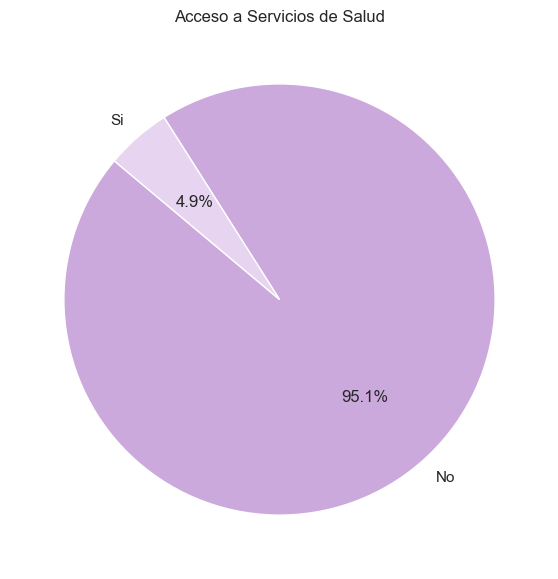

In [299]:
healthcare_counts = df['AnyHealthcare'].value_counts()

plt.figure(figsize=(7,7))

plt.pie(
    healthcare_counts,
    labels=["No", "Si"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["#CCA9DD", "#E6D4F0"],
)

plt.title("Acceso a Servicios de Salud")
plt.show()

La distribución del acceso a servicios de salud muestra una marcada predominancia de individuos que reportan contar con cobertura o acceso sanitario. En particular, el 95.11% (n = 241,263) de la población indica tener acceso a servicios de salud, mientras que únicamente el 4.89% (n = 12,417) manifiesta no disponer de dicho acceso.

Esta fuerte concentración en la categoría afirmativa evidencia una población ampliamente integrada al sistema de atención sanitaria, lo cual es consistente con el diseño de encuestas poblacionales enfocadas en monitoreo de condiciones de salud en adultos. Sin embargo, la baja proporción relativa del grupo sin acceso introduce un desbalance estructural que debe considerarse en análisis posteriores, especialmente en comparaciones entre grupos o en modelos predictivos, donde la menor representación puede afectar la estabilidad de estimaciones para esta categoría.

#### **7.2.4. Barrera económica**

In [303]:
var_cat = df_viz["NoDocbcCost"].agg([
    "count"
])

frecuencias = df_viz["NoDocbcCost"].value_counts()

porcentajes = df_viz["NoDocbcCost"].value_counts(normalize=True) * 100

tabla_barrera = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_barrera


,Frecuencia,Porcentaje (%)
NoDocbcCost,,
Sin barrera económica,232326,91.58
Con barrera económica,21354,8.42


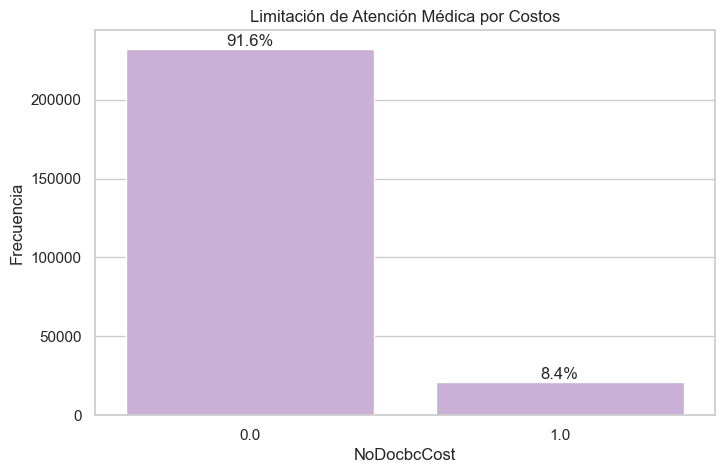

In [304]:
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='NoDocbcCost',
    data=df,
    color="#CCA9DD"
)

total = len(df)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Limitación de Atención Médica por Costos")
plt.xlabel("NoDocbcCost")
plt.ylabel("Frecuencia")

plt.show()

La variable refleja la proporción de individuos que reportaron no haber acudido al médico en el último año debido a limitaciones económicas. Los resultados indican que el 91.58% (n = 232,326) de la muestra no experimentó barreras económicas para acceder a consulta médica, mientras que el 8.42% (n = 21,354) sí reportó haber pospuesto o evitado atención médica por motivos de costo.

Aunque la mayoría de la población no presenta esta limitación, el porcentaje cercano al 8% no es despreciable desde una perspectiva de salud pública, ya que representa un segmento vulnerable cuya condición económica puede incidir en diagnósticos tardíos, menor seguimiento clínico y potencial agravamiento de enfermedades crónicas.

### **7.3. Variables de conducta y estilo de vida**

#### **7.3.1. Fumador**

In [305]:
var_cat = df_viz["Smoker"].agg([
    "count"
])

frecuencias = df_viz["Smoker"].value_counts()

porcentajes = df_viz["Smoker"].value_counts(normalize=True) * 100

tabla_fum = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_fum

,Frecuencia,Porcentaje (%)
Smoker,,
No fumador,141257,55.68
Fumador,112423,44.32


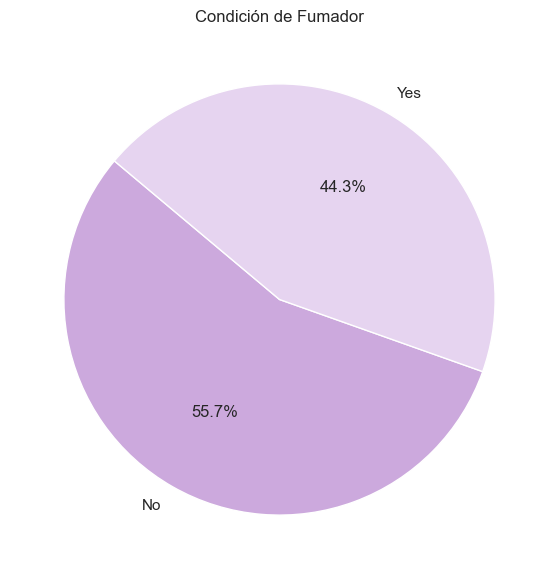

In [306]:
smoker_counts = df['Smoker'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    smoker_counts,
    labels=["No", "Yes"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["#CCA9DD", "#E6D4F0"],
)

plt.title("Condición de Fumador")
plt.show()

La distribución de la variable Smoker muestra que el 55.68% (n = 141,257) de la población reporta no ser fumador, mientras que el 44.32% (n = 112,423) corresponde a individuos que sí presentan antecedente de consumo de tabaco.

A diferencia de otras variables previamente analizadas, la proporción entre categorías no presenta un desbalance extremo, lo que indica una representación relativamente significativa del grupo fumador dentro del dataset. Este patrón sugiere que el consumo de tabaco constituye un comportamiento de riesgo ampliamente presente en la población estudiada, con una magnitud suficiente para permitir comparaciones robustas entre grupos.

#### **7.3.2. Actividad física**

In [307]:
var_cat = df_viz["PhysActivity"].agg([
    "count"
])

frecuencias = df_viz["PhysActivity"].value_counts()

porcentajes = df_viz["PhysActivity"].value_counts(normalize=True) * 100

tabla_actifi = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_actifi

,Frecuencia,Porcentaje (%)
PhysActivity,,
Con actividad física,191920,75.65
Sin actividad física,61760,24.35


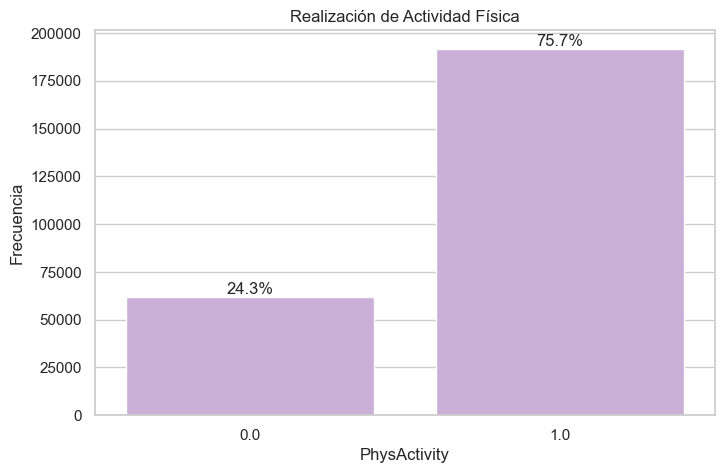

In [308]:
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='PhysActivity',
    data=df,
    color="#CCA9DD"
)

total = len(df)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title("Realización de Actividad Física")
plt.xlabel("PhysActivity")
plt.ylabel("Frecuencia")

plt.show()

La distribución de la variable PhysActivity indica que el 75.65% (n = 191,920) de la población reporta haber realizado actividad física en los últimos 30 días, mientras que el 24.35% (n = 61,760) señala no haber realizado ningún tipo de actividad física durante ese periodo.

Esta estructura evidencia una clara predominancia de individuos con algún nivel de actividad física reciente, lo cual sugiere una muestra mayoritariamente activa desde el punto de vista conductual. Sin embargo, la proporción cercana a una cuarta parte de la población que reporta inactividad no es marginal desde una perspectiva epidemiológica, dado que el sedentarismo constituye un factor de riesgo relevante para enfermedades cardiovasculares, metabólicas y otras condiciones crónicas.

#### **7.3.3. Consumo de frutas**

In [309]:
var_cat = df_viz["Fruits"].agg([
    "count"
])

frecuencias = df_viz["Fruits"].value_counts()

porcentajes = df_viz["Fruits"].value_counts(normalize=True) * 100

tabla_fruta = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_fruta

,Frecuencia,Porcentaje (%)
Fruits,,
Consume frutas diario,160898,63.43
No consume frutas diario,92782,36.57


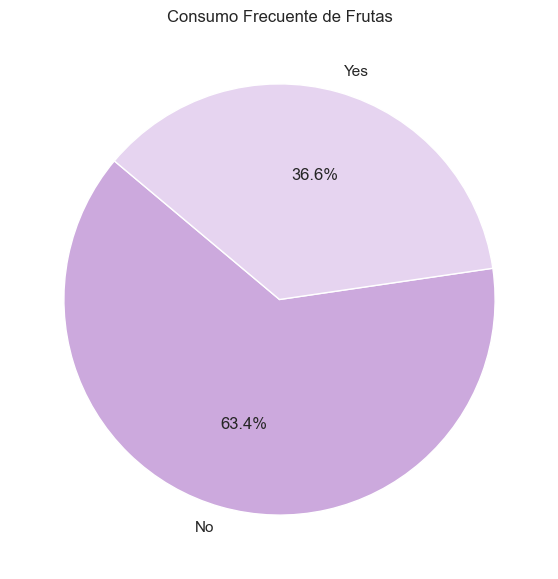

In [310]:
fruits_counts = df['Fruits'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    fruits_counts,
    labels=["No", "Yes"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["#CCA9DD", "#E6D4F0"]
)

plt.title("Consumo Frecuente de Frutas")
plt.show()

La distribución de la variable Fruits muestra que el 63.43% (n = 160,898) de los individuos reporta consumir frutas de manera regular, mientras que el 36.57% (n = 92,782) indica no mantener este hábito alimenticio.

Estos resultados evidencian una predominancia del consumo de frutas dentro de la población analizada; sin embargo, la proporción de individuos que no reporta consumo regular continúa siendo considerable, representando más de un tercio de la muestra. Desde una perspectiva de salud pública, esta distribución sugiere la coexistencia de comportamientos alimentarios saludables junto con un segmento relevante de la población potencialmente expuesto a factores dietarios de riesgo.

#### **7.3.4. Consumo de vegetales**

In [311]:
var_cat = df_viz["Veggies"].agg([
    "count"
])

frecuencias = df_viz["Veggies"].value_counts()

porcentajes = df_viz["Veggies"].value_counts(normalize=True) * 100

tabla_vege = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_vege

,Frecuencia,Porcentaje (%)
Veggies,,
Consume verduras diario,205841,81.14
No consume verduras diario,47839,18.86


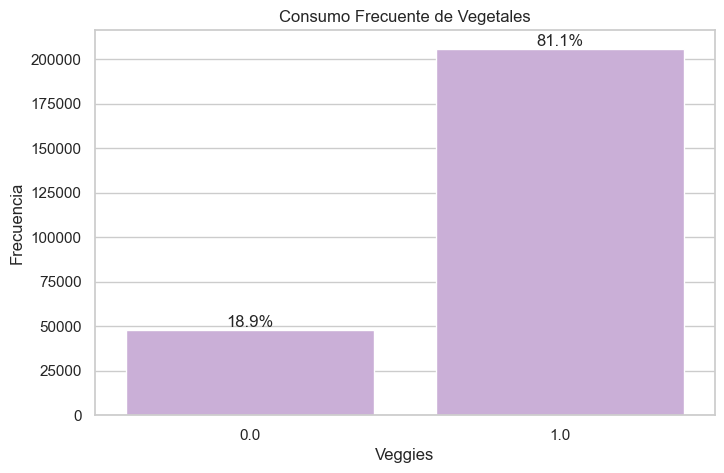

In [312]:
plt.figure(figsize=(8,5))

ax=sns.countplot(
    x='Veggies',
    data=df,
    palette=["#CCA9DD","#CCA9DD"]
)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center',
        va='bottom'
    )
plt.title("Consumo Frecuente de Vegetales")
plt.xlabel("Veggies")
plt.ylabel("Frecuencia")

plt.show()

La distribución de la variable indica que el 81.14% (n = 205,841) de los individuos reporta consumir vegetales de manera regular, mientras que el 18.86% (n = 47,839) señala no incluir este tipo de alimentos en su consumo habitual.

Estos resultados evidencian una alta prevalencia de consumo de vegetales dentro de la población analizada, lo que sugiere la presencia generalizada de comportamientos alimentarios asociados a patrones nutricionales saludables. No obstante, la proporción cercana al 19% de individuos sin consumo regular continúa siendo relevante desde una perspectiva epidemiológica, dado que dietas bajas en vegetales se asocian con mayor riesgo de enfermedades crónicas no transmisibles.

#### **7.3.5. Consumo elevado de alcohol**

In [313]:
var_cat = df_viz["HvyAlcoholConsump"].agg([
    "count"
])

frecuencias = df_viz["HvyAlcoholConsump"].value_counts()

porcentajes = df_viz["HvyAlcoholConsump"].value_counts(normalize=True) * 100

tabla_alco = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_alco

,Frecuencia,Porcentaje (%)
HvyAlcoholConsump,,
No consumo alto alcohol,239424,94.38
Consumo alto alcohol,14256,5.62


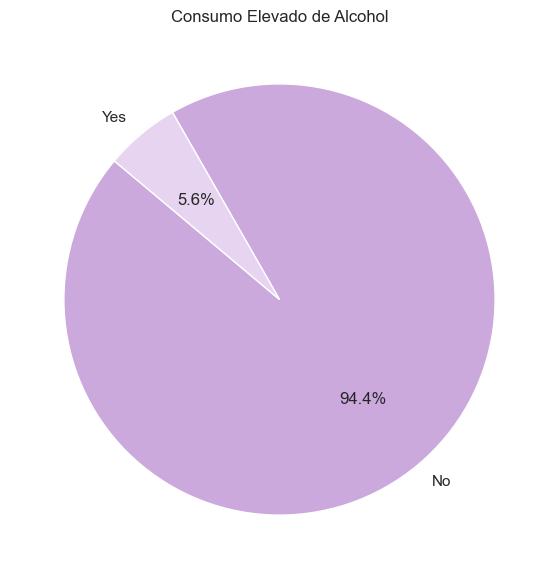

In [314]:
alcohol_counts = df['HvyAlcoholConsump'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    alcohol_counts,
    labels=["No", "Yes"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["#CCA9DD", "#E6D4F0"],
)

plt.title("Consumo Elevado de Alcohol")
plt.show()

La distribución muestra que el 94.38% (n = 239,424) de los individuos no reporta consumo excesivo de alcohol, mientras que el 5.62% (n = 14,256) sí presenta patrones de consumo considerados elevados o de riesgo.

Esta marcada diferencia entre categorías indica que el consumo excesivo de alcohol constituye un comportamiento relativamente poco frecuente dentro de la población analizada. Sin embargo, aunque minoritario, el grupo que presenta este patrón mantiene una relevancia epidemiológica importante, dado que el consumo elevado de alcohol se asocia con múltiples efectos adversos sobre la salud, incluyendo enfermedades cardiovasculares, hepáticas y trastornos metabólicos.

#### **7.3.6. Chequeo de colesterol**

In [315]:
var_cat = df_viz["CholCheck"].agg([
    "count"
])

frecuencias = df_viz["CholCheck"].value_counts()

porcentajes = df_viz["CholCheck"].value_counts(normalize=True) * 100

tabla_coles = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_coles

,Frecuencia,Porcentaje (%)
CholCheck,,
Con chequeo en 5 años,244210,96.27
Sin chequeo en 5 años,9470,3.73


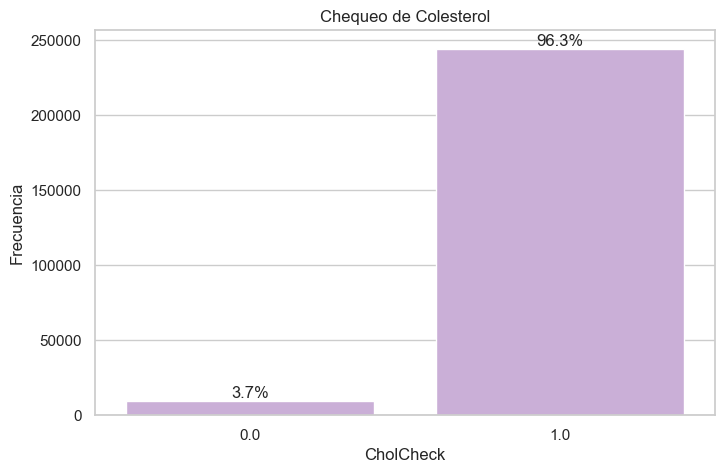

In [316]:
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='CholCheck',
    data=df,
    color="#CCA9DD"
)

total = len(df)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title("Chequeo de Colesterol")
plt.xlabel("CholCheck")
plt.ylabel("Frecuencia")

plt.show()

La distribución de la variable CholCheck indica que el 96.27% (n = 244,210) de los individuos reporta haberse realizado un control de colesterol en los últimos cinco años, mientras que únicamente el 3.73% (n = 9,470) señala no haber efectuado dicha evaluación en ese periodo.

Este patrón refleja una alta cobertura en prácticas preventivas relacionadas con monitoreo cardiovascular dentro de la población estudiada. La proporción mayoritaria sugiere una población ampliamente integrada a esquemas de seguimiento médico, particularmente en lo que respecta a factores de riesgo metabólico.

### **7.4. Variables de factores clínicos y metabólicos**

#### **7.4.1. Indice de Masa Corporal (BMI)**

In [318]:
bmi_summary = df["BMI"].describe()  # incluye count, mean, std, min, 25%, 50%, 75%, max
bmi_summary_df = bmi_summary.to_frame(name="BMI").round(2)
bmi_summary_df

,BMI
count,253680.00
mean,28.38
std,6.61
min,12.00
25%,24.00
50%,27.00
75%,31.00
max,98.00


El resumen estadístico del Índice de Masa Corporal (BMI) muestra un total de
**253,680 observaciones**, con un valor promedio de **28.38** y una mediana de
**27.00**, lo que indica que la mitad de los individuos presenta valores de BMI
iguales o inferiores a este punto central.

Los valores se distribuyen entre un mínimo de **12.00** y un máximo de
**98.00**, evidenciando un amplio rango dentro de la variable. El primer
cuartil (**Q1 = 24.00**) y el tercer cuartil (**Q3 = 31.00**) indican que el
50% central de las observaciones se concentra dentro de este intervalo.

La desviación estándar de **6.61** refleja la variabilidad presente en los
valores de BMI dentro del conjunto de datos analizado.

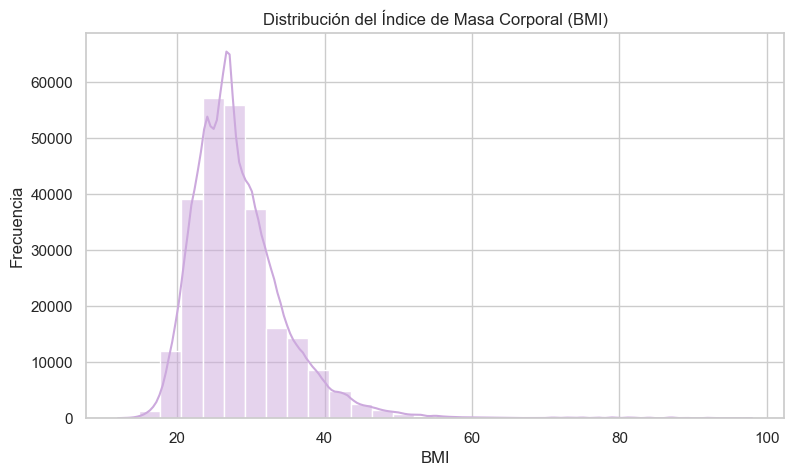

In [319]:
plt.figure(figsize=(9,5))

sns.histplot(
    df["BMI"],
    kde=True,
    color="#CCA9DD",
    bins=30
)

plt.title("Distribución del Índice de Masa Corporal (BMI)")
plt.xlabel("BMI")
plt.ylabel("Frecuencia")

plt.show()

La distribución del Índice de Masa Corporal (BMI) muestra una mayor
concentración de observaciones en valores intermedios, con una frecuencia más
alta alrededor del rango comprendido aproximadamente entre **24 y 31**, en
coherencia con los cuartiles observados previamente en el resumen estadístico.

Asimismo, la forma de la distribución presenta una extensión visible hacia
valores más altos de BMI, sugiriendo una **asimetría hacia la derecha**. Esta
característica podría indicar la presencia de valores extremos en la parte
superior de la distribución.


#### **7.4.2. Presión arterial alta**

In [320]:
var_cat = df_viz["HighBP"].agg([
    "count"
])

frecuencias = df_viz["HighBP"].value_counts()

porcentajes = df_viz["HighBP"].value_counts(normalize=True) * 100

tabla_PAA = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_PAA

,Frecuencia,Porcentaje (%)
HighBP,,
Sin hipertensión,144851,57.1
Con hipertensión,108829,42.9


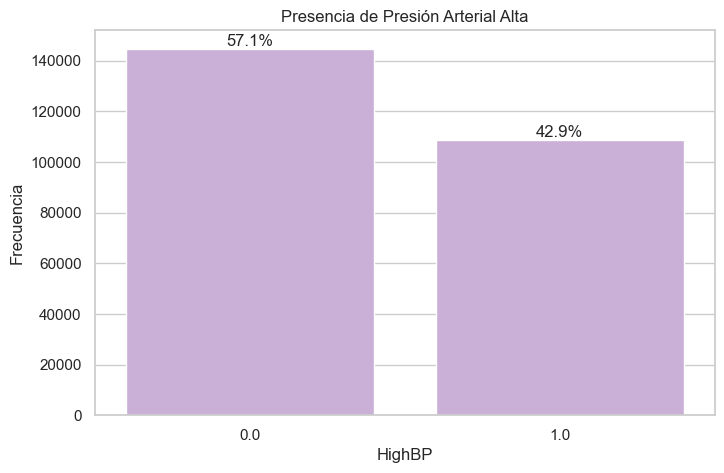

In [321]:
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='HighBP',
    data=df,
    color="#CCA9DD"
)

total = len(df)

for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(
        percentage,
        (p.get_x()+p.get_width()/2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title("Presencia de Presión Arterial Alta")
plt.xlabel("HighBP")
plt.ylabel("Frecuencia")

plt.show()

La distribución muestra que el 57.10% (n = 144,851) de los individuos no reporta diagnóstico de hipertensión arterial, mientras que el 42.90% (n = 108,829) sí presenta antecedentes de presión arterial alta.

A diferencia de otras variables relacionadas con conductas o acceso a servicios de salud, la proporción de individuos con hipertensión resulta considerablemente elevada, evidenciando una presencia sustancial de esta condición dentro de la población analizada. La cercanía relativa entre ambas categorías sugiere una distribución más equilibrada, lo que indica que la hipertensión constituye un fenómeno ampliamente representado en el dataset y no un evento marginal.

#### **7.4.3. Colesterol alto**

In [322]:
var_cat = df_viz["HighChol"].agg([
    "count"
])

frecuencias = df_viz["HighChol"].value_counts()

porcentajes = df_viz["HighChol"].value_counts(normalize=True) * 100

tabla_CA = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_CA

,Frecuencia,Porcentaje (%)
HighChol,,
Sin colesterol alto,146089,57.59
Con colesterol alto,107591,42.41


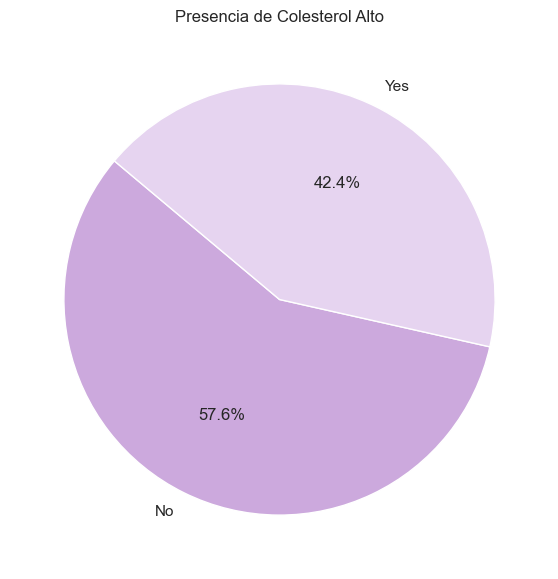

In [323]:
chol_counts = df['HighChol'].value_counts()

plt.figure(figsize=(7,7))

plt.pie(
    chol_counts,
    labels=["No","Yes"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["#CCA9DD","#E6D4F0"],
)

plt.title("Presencia de Colesterol Alto")
plt.show()

La distribución de la variable HighChol indica que el 57.59% (n = 146,089) de los individuos no reporta niveles elevados de colesterol, mientras que el 42.41% (n = 107,591) sí presenta diagnóstico de hipercolesterolemia.

Al igual que en el caso de la hipertensión arterial, la proporción de individuos con colesterol alto es considerablemente elevada, representando más de dos quintas partes de la población analizada. Esta magnitud evidencia que las alteraciones metabólicas constituyen un componente sustancial dentro del perfil de salud del dataset y no un evento aislado o marginal.

### **7.5. Variables de estado funcional y percepción de la salud**

#### **7.5.1. Percepción del estado de salud**

In [324]:
genhlth_cat = {
    1: "Excelente",
    2: "Muy buena",
    3: "Buena",
    4: "Regular",
    5: "Mala"
}

tabla_genhlth = df["GenHlth"].value_counts().sort_index().reset_index()
tabla_genhlth.columns = ["Código", "N"]

tabla_genhlth["Categoría"] = tabla_genhlth["Código"].map(genhlth_cat)

tabla_genhlth["%"] = (
    tabla_genhlth["N"] / tabla_genhlth["N"].sum() * 100
).round(2)

tabla_genhlth = tabla_genhlth[["Código", "Categoría", "N", "%"]]

tabla_genhlth

,Código,Categoría,N,%
0,1.0,Excelente,45299,17.86
1,2.0,Muy buena,89084,35.12
2,3.0,Buena,75646,29.82
3,4.0,Regular,31570,12.44
4,5.0,Mala,12081,4.76


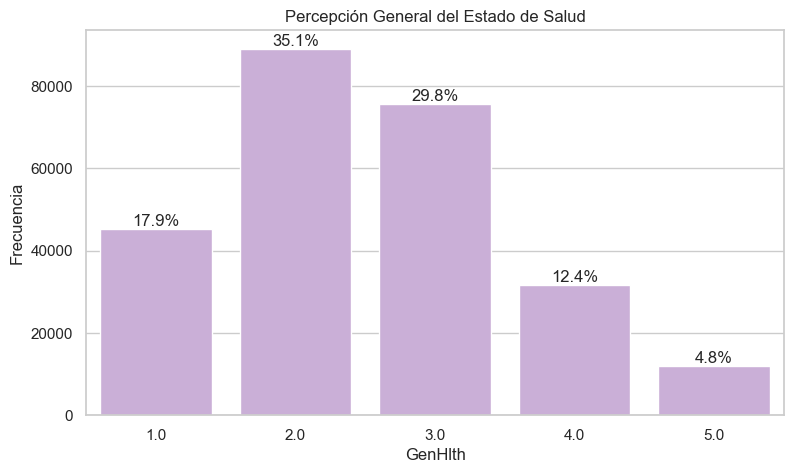

In [325]:
plt.figure(figsize=(9,5))

ax = sns.countplot(
    x='GenHlth',
    data=df,
    color="#CCA9DD",
    order=sorted(df['GenHlth'].unique())
)

total = len(df)

for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(
        percentage,
        (p.get_x()+p.get_width()/2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title("Percepción General del Estado de Salud")
plt.xlabel("GenHlth")
plt.ylabel("Frecuencia")

plt.show()

La percepción general del estado de salud, presenta una distribución predominantemente concentrada en valoraciones positivas o intermedias. La categoría más frecuente corresponde a “Buena”, con el 29.82% (n = 75,646) de las observaciones, seguida por “Muy buena” (35.12%) y “Excelente” (17.86%). En conjunto, estas tres categorías agrupan más del 80% de la población, indicando una percepción global favorable del estado de salud entre los individuos analizados.

Por otro lado, las categorías asociadas a percepciones menos favorables, “Regular” (12.44%) y “Mala” (4.76%), representan una proporción considerablemente menor, aunque epidemiológicamente relevante, ya que suelen asociarse con mayor carga de enfermedad crónica, limitaciones funcionales y mayor utilización de servicios sanitarios.

#### **7.5.2. Días con mala salud física**

In [ ]:
plt.figure(figsize=(9,6))

ax = sns.countplot(
    y='PhysHlth',
    data=df,
    color="#CCA9DD",
    order=sorted(df['PhysHlth'].unique())
)

# Total de observaciones
total = len(df)

# Agregar porcentajes
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%'
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    ax.annotate(
        percentage,
        (x, y),
        ha='left',
        va='center',
        fontsize=10,
        xytext=(5, 0),
        textcoords='offset points'
    )

plt.title("Distribución de Días con Mala Salud Física")
plt.xlabel("Frecuencia")
plt.ylabel("Número de días")

plt.show()

#### **7.5.3. Días con mala salud mental**

In [ ]:
plt.figure(figsize=(9,6))

ax = sns.countplot(
    y='MentHlth',
    data=df,
    color="#CCA9DD",
    order=sorted(df['MentHlth'].unique())
)

# Total de observaciones
total = len(df)

# Agregar porcentajes
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%'
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    ax.annotate(
        percentage,
        (x, y),
        ha='left',
        va='center',
        fontsize=10,
        xytext=(5, 0),
        textcoords='offset points'
    )

plt.title("Distribución de Días con Mala Salud Mental")
plt.xlabel("Frecuencia")
plt.ylabel("Número de días")

plt.show()

#### **7.5.4. Dificultad para caminar**

In [326]:
var_cat = df_viz["DiffWalk"].agg([
    "count"
])

frecuencias = df_viz["DiffWalk"].value_counts()

porcentajes = df_viz["DiffWalk"].value_counts(normalize=True) * 100

tabla_difc = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_difc

,Frecuencia,Porcentaje (%)
DiffWalk,,
Sin dificultad al caminar,211005,83.18
Con dificultad al caminar,42675,16.82


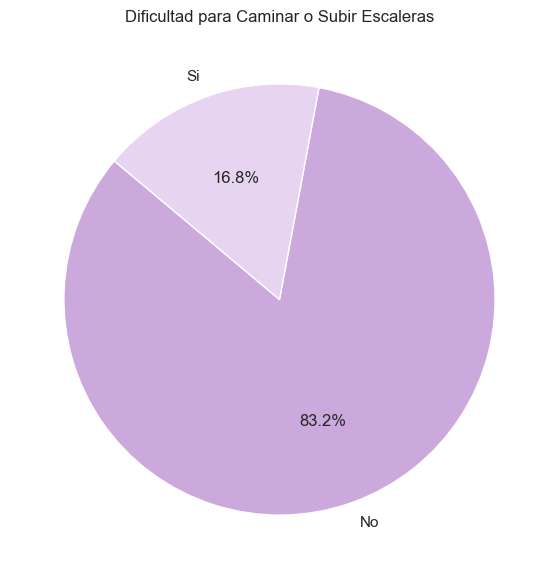

In [327]:
diffwalk_counts = df['DiffWalk'].value_counts()

plt.figure(figsize=(7,7))

plt.pie(
    diffwalk_counts,
    labels=["No","Si"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["#CCA9DD","#E6D4F0"],
)

plt.title("Dificultad para Caminar o Subir Escaleras")
plt.show()

La distribución de la variable DiffWalk, que evalúa la presencia de dificultades para caminar o subir escaleras, indica que el 83.18% (n = 211,005) de los individuos no reporta limitaciones funcionales de movilidad, mientras que el 16.82% (n = 42,675) sí manifiesta algún grado de dificultad en estas actividades.

Aunque la mayoría de la población no presenta restricciones de movilidad, la proporción cercana al 17% resulta significativa desde una perspectiva de salud pública, ya que las limitaciones funcionales suelen asociarse con envejecimiento, presencia de enfermedades crónicas y determioro del estado general de salud. Este grupo puede representar individuos con mayor vulnerabilidad física y mayor probabilidad de requerir atención médica continua.

### **7.6. Eventos cardiovasculares mayores**

#### **7.6.1. Antecedente de Accidente Cerebrovascular**

In [328]:
var_cat = df_viz["Stroke"].agg([
    "count"
])

frecuencias = df_viz["Stroke"].value_counts()

porcentajes = df_viz["Stroke"].value_counts(normalize=True) * 100

tabla_stroke = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_stroke

,Frecuencia,Porcentaje (%)
Stroke,,
Sin ACV,243388,95.94
Con ACV,10292,4.06


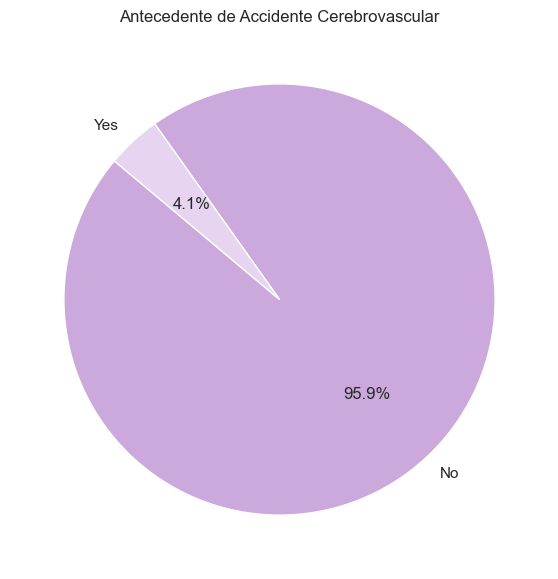

In [329]:
stroke_counts = df['Stroke'].value_counts()

plt.figure(figsize=(7,7))

plt.pie(
    stroke_counts,
    labels=["No", "Yes"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["#CCA9DD", "#E6D4F0"],
)

plt.title("Antecedente de Accidente Cerebrovascular")
plt.show()

La distribución de la variable Stroke indica que el 95.94% (n = 243,388) de los individuos no reporta antecedente de accidente cerebrovascular, mientras que el 4.06% (n = 10,292) sí presenta historial de esta condición.

Aunque la proporción de casos es relativamente baja en términos absolutos, su relevancia clínica es significativa, dado que el accidente cerebrovascular constituye un evento de alta gravedad, asociado a morbilidad sustancial, discapacidad funcional y aumento del riesgo de mortalidad. La baja prevalencia observada es consistente con la naturaleza de esta condición en población general, donde, a pesar de su impacto severo, su frecuencia es menor en comparación con otros factores de riesgo cardiovascular como hipertensión o colesterol elevado.

#### **7.6.2. Enfermedad/ateque cardíaco**

In [330]:
var_cat = df_viz["HeartDiseaseorAttack"].agg([
    "count"
])

frecuencias = df_viz["HeartDiseaseorAttack"].value_counts()

porcentajes = df_viz["HeartDiseaseorAttack"].value_counts(normalize=True) * 100

tabla_ataq = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_ataq

,Frecuencia,Porcentaje (%)
HeartDiseaseorAttack,,
Sin enfermedad cardíaca,229787,90.58
Con enfermedad cardíaca,23893,9.42


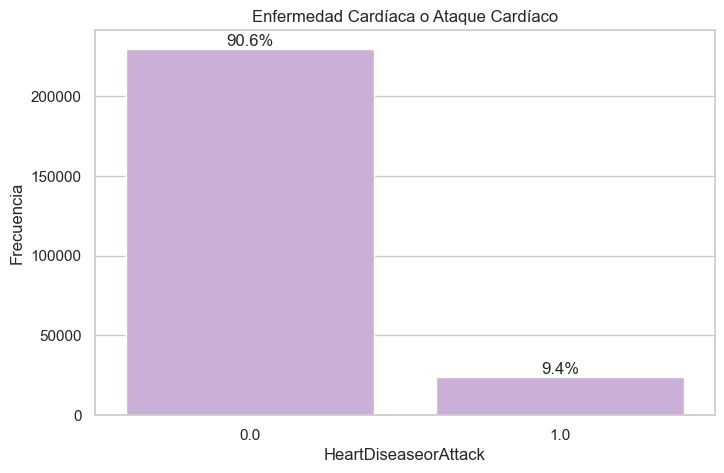

In [331]:
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='HeartDiseaseorAttack',
    data=df,
    color="#CCA9DD"
)

total = len(df)

for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(
        percentage,
        (p.get_x()+p.get_width()/2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title("Enfermedad Cardíaca o Ataque Cardíaco")
plt.xlabel("HeartDiseaseorAttack")
plt.ylabel("Frecuencia")

plt.show()

La distribución muestra que el 90.58% (n = 229,787) de los individuos no reporta antecedente de enfermedad cardíaca o infarto de miocardio, mientras que el 9.42% (n = 23,893) sí presenta historial de este tipo de evento cardiovascular.

Aunque la mayoría de la población no reporta diagnóstico previo, la proporción cercana al 9.5% resulta epidemiológicamente significativa, ya que las enfermedades cardiovasculares constituyen una de las principales causas de morbilidad y mortalidad a nivel poblacional. En comparación con la variable Stroke, la prevalencia observada es más elevada, lo cual es consistente con la mayor frecuencia relativa de eventos coronarios frente a accidentes cerebrovasculares en población adulta.

### **7.8. Variable objetivo: Diagnóstico de diabetes**

In [332]:
var_cat = df_viz["Diabetes_binary"].agg([
    "count"
])

frecuencias = df_viz["Diabetes_binary"].value_counts()

porcentajes = df_viz["Diabetes_binary"].value_counts(normalize=True) * 100

tabla_objetivo = pd.DataFrame({
    "Frecuencia": frecuencias,
    "Porcentaje (%)": porcentajes
}).round(2)

tabla_objetivo

,Frecuencia,Porcentaje (%)
Diabetes_binary,,
Sin diabetes,218334,86.07
Prediabetes / Diabetes,35346,13.93


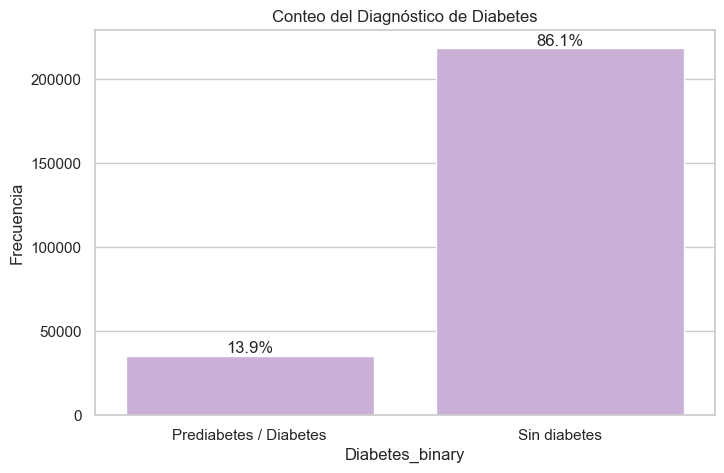

In [335]:
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='Diabetes_binary',
    data=df_viz,
    color="#CCA9DD"
)

total = len(df_viz)

for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(
        percentage,
        (p.get_x()+p.get_width()/2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title("Conteo del Diagnóstico de Diabetes")
plt.xlabel("Diabetes_binary")
plt.ylabel("Frecuencia")

plt.show()

La variable Diagnóstico de Diabetes, que constituye el desenlace principal del estudio, muestra que el 13.93% (n = 35,346) de los individuos presenta diagnóstico de diabetes, mientras que el 86.07% (n = 218,334) no reporta esta condición.

Desde una perspectiva epidemiológica, la prevalencia observada resulta consistente con patrones poblacionales de diabetes mellitus tipo 2 en población adulta, especialmente en contextos donde predominan grupos etarios intermedios y avanzados, como se evidenció previamente en la distribución por edad del dataset.

## **8. Análisis bivariado**

El análisis bivariado busca explorar la relación entre dos variables con el fin de identificar asociaciones, diferencias significativas o patrones conjuntos de comportamiento. Dependiendo del tipo de variables (numéricas o categóricas), se emplean herramientas como gráficos comparativos, medidas de correlación o pruebas estadísticas. Esta etapa permite evaluar posibles relaciones relevantes para el fenómeno estudiado y aporta evidencia preliminar sobre vínculos que podrían ser profundizados en modelos explicativos posteriores.

### **8.1 Variable objetivo vs variables categóricas (binarias)**

#### **8.1.1 Objetivo vs HighBP**

In [ ]:
# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz["HighBP"])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz["HighBP"],
    normalize="index"
) * 100

# Combinar frecuencia y porcentaje en una sola tabla
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_pct["Total"] = 100

tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

tabla_final

HighBP,Con hipertensión,Sin hipertensión,Total
Diabetes_binary,,,
Prediabetes / Diabetes,26604 (75.27%),8742 (24.73%),35346 (100%)
Sin diabetes,82225 (37.66%),136109 (62.34%),218334 (100%)


In [152]:
# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")

Chi-cuadrado: 17562.45
Grados de libertad: 1
p-valor: 0.0
Odds Ratio (OR): 5.04


La tabla de contingencia evidencia una asociación clara entre la presencia de hipertensión y el diagnóstico de prediabetes/diabetes. En el grupo con **Prediabetes / Diabetes**, el 75.27% presenta hipertensión, mientras que solo el 24.73% no la presenta. En contraste, dentro del grupo **Sin diabetes**, el porcentaje con hipertensión disminuye considerablemente al 37.66%, siendo mayoritario el grupo sin hipertensión (62.34%).

Desde el punto de vista estadístico, la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² = 17562.45** con un p-valor < 0.001 (reportado como 0.0 por redondeo computacional), lo que indica que existe evidencia estadísticamente significativa para rechazar la hipótesis nula de independencia entre las variables. En consecuencia, se concluye que la presencia de hipertensión está significativamente asociada con el diagnóstico de prediabetes/diabetes en la muestra analizada.

Adicionalmente, el Odds Ratio **(OR = 5.04)** indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente cinco veces mayores en individuos con hipertensión en comparación con aquellos sin hipertensión. Este valor cuantifica la magnitud de la asociación y confirma que no solo existe significancia estadística, esperable dada la gran muestra, sino también una relación fuerte desde el punto de vista epidemiológico.

En consecuencia, se concluye que la hipertensión constituye un factor significativamente asociado al estado diabético en la muestra analizada, consolidándose como una condición estrechamente vinculada al riesgo metabólico.

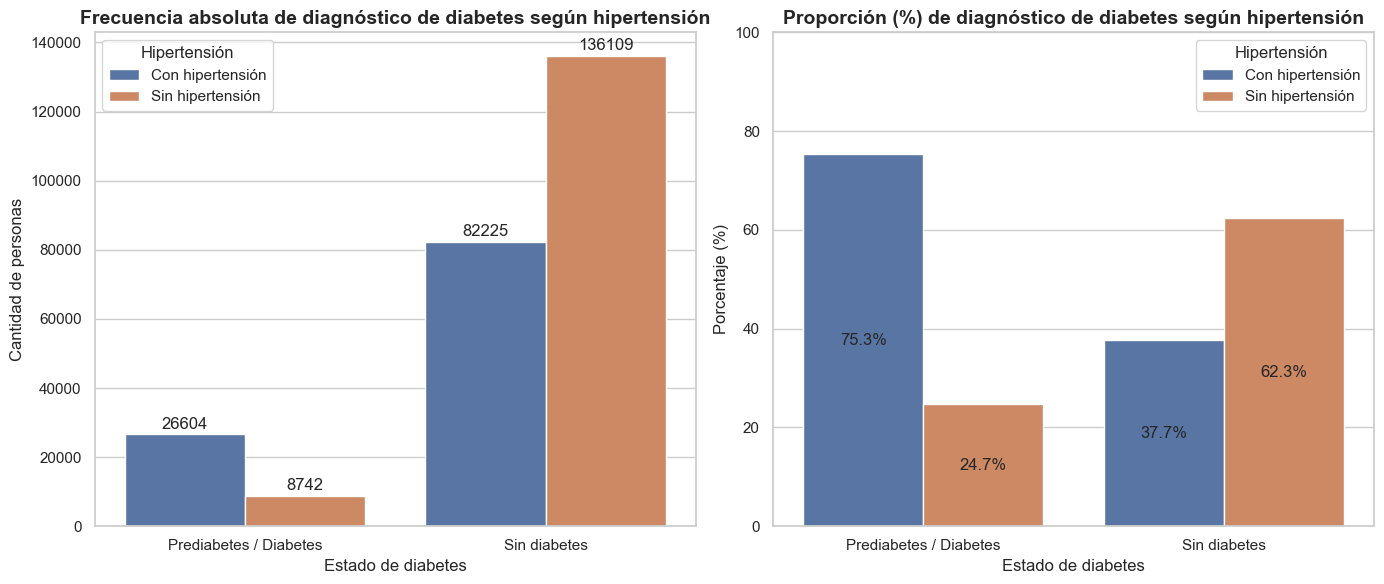

In [ ]:
# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz["HighBP"],
    normalize="index"
) * 100

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz["HighBP"])

# Formato largo
plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name="Hipertensión",
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name="Hipertensión",
          value_name="Frecuencia")
)


#GRAFICO
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue="Hipertensión",
    ax=axes[0]
)

ax1.set_title("Frecuencia absoluta de diagnóstico de diabetes según hipertensión",
              fontsize=14, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=12)

# ---- Proporciones ----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue="Hipertensión",
    ax=axes[1]  
)

ax2.set_title("Proporción (%) de diagnóstico de diabetes según hipertensión",
              fontsize=14, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=12)

plt.tight_layout()
plt.show()

#### **8.1.2 Objetivo vs HighChol**

In [268]:
# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz["HighChol"])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz["HighChol"],
    normalize="index"
) * 100

# Combinar frecuencia y porcentaje en una sola tabla
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_pct["Total"] = 100

tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

tabla_final

HighChol,Con colesterol alto,Sin colesterol alto,Total
Diabetes_binary,,,
Prediabetes / Diabetes,23686 (67.01%),11660 (32.99%),35346 (100%)
Sin diabetes,83905 (38.43%),134429 (61.57%),218334 (100%)


In [150]:
# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")


Chi-cuadrado: 10174.07
Grados de libertad: 1
p-valor: 0.0
Odds Ratio (OR): 3.25


La tabla de contingencia evidencia una diferencia sustancial en la distribución del colesterol alto según el estado diabético. Dentro del grupo con **Prediabetes / Diabetes**, el 67.01% presenta colesterol alto, mientras que el 32.99% no lo presenta. En contraste, en el grupo Sin **diabetes**, solo el 38.43% presenta colesterol alto y el 61.57% no lo presenta.

Esta diferencia porcentual sugiere una asociación relevante entre ambas condiciones metabólicas. La prueba Chi-cuadrado de independencia arroja un estadístico de **χ² = 10174.07**, con 1 grado de libertad y un p-valor < 0.001 (reportado como 0.0 por redondeo computacional). Dado que el p-valor es significativamente menor al nivel de significancia convencional (α = 0.05), se rechaza la hipótesis nula de independencia.

Adicionalmente, el Odds Ratio **(OR = 3.25)** indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente 3.25 veces mayores en individuos con colesterol alto en comparación con aquellos sin colesterol alto. Este valor cuantifica la magnitud de la asociación y evidencia que no solo existe significancia estadística, esperable dada la gran muestra, sino también una relación de magnitud moderada a fuerte desde el punto de vista epidemiológico.

En consecuencia, se concluye que el colesterol alto se encuentra significativamente asociado con la presencia de prediabetes/diabetes en la muestra analizada, en línea con la evidencia epidemiológica que vincula dislipidemias y trastornos metabólicos.



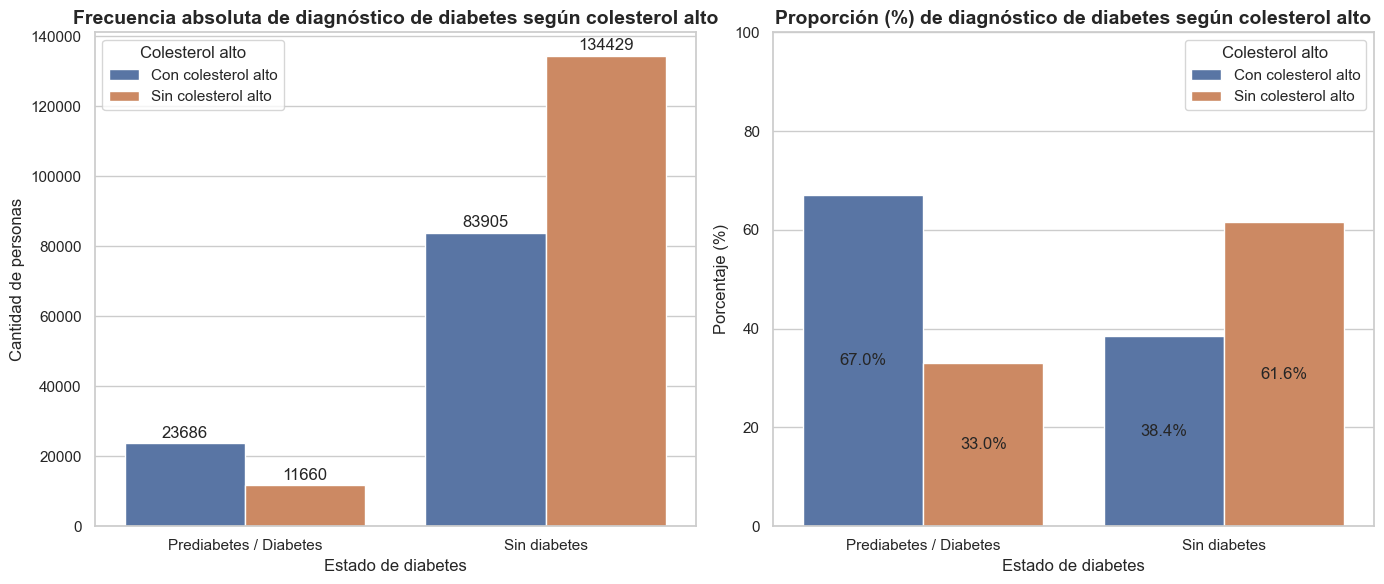

In [ ]:
# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz["HighChol"],
    normalize="index"
) * 100

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz["HighChol"])

# Formato largo
plot_pct = (
    tabla_pct
    .reset_index()
    .melt(
        id_vars="Diabetes_binary",
        var_name="Colesterol alto",
        value_name="Porcentaje"
    )
)

plot_abs = (
    tabla_abs
    .reset_index()
    .melt(
        id_vars="Diabetes_binary",
        var_name="Colesterol alto",
        value_name="Frecuencia"
    )
)


#GRAFICO
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue="Colesterol alto",
    ax=axes[0]  
)

ax1.set_title(
    "Frecuencia absoluta de diagnóstico de diabetes según colesterol alto",
    fontsize=14, fontweight="bold"
)
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=12)

# ---- Proporciones ----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue="Colesterol alto",
    ax=axes[1]
)

ax2.set_title(
    "Proporción (%) de diagnóstico de diabetes según colesterol alto",
    fontsize=14, fontweight="bold"
)
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=12)

plt.tight_layout()
plt.show()

#### **8.1.3 Objetivo vs CholCheck**

In [269]:
variable = "CholCheck"   

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz[variable])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz[variable],
    normalize="index"
) * 100

# Combinar frecuencia + porcentaje
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

print("Tabla de contingencia (Frecuencia y % por fila)")
display(tabla_final)

Tabla de contingencia (Frecuencia y % por fila)


CholCheck,Con chequeo en 5 años,Sin chequeo en 5 años,Total
Diabetes_binary,,,
Prediabetes / Diabetes,35105 (99.32%),241 (0.68%),35346 (100%)
Sin diabetes,209105 (95.77%),9229 (4.23%),218334 (100%)


In [ ]:

chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("\nChi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")




Chi-cuadrado: 1062.94
Grados de libertad: 1
p-valor: 3.75139887891887e-233
Odds Ratio (OR): 6.43


La tabla de contingencia evidencia diferencias claras en la realización del **chequeo de colesterol** en los últimos cinco años según el estado diabético. En el grupo con **Prediabetes / Diabetes**, el 99.32% reporta haberse realizado un chequeo de colesterol, mientras que solo el 0.68% no lo ha hecho. En contraste, dentro del grupo **Sin diabetes**, el 95.77% se ha realizado el chequeo y el 4.23% no lo ha hecho.

Aunque en ambos grupos el porcentaje de chequeo es alto, la diferencia relativa entre quienes no se realizan el examen es notablemente mayor en el grupo sin diabetes. Desde el punto de vista estadístico, la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² = 1062.94**, con 1 grado de libertad y un p-valor < 0.001, lo que indica evidencia estadísticamente significativa para rechazar la hipótesis nula de independencia entre las variables.

Adicionalmente, el Odds Ratio **(OR = 6.43)** indica que las probabilidades relativas de pertenecer al grupo con prediabetes/diabetes son aproximadamente 6.4 veces mayores en quienes se han realizado un chequeo de colesterol en comparación con quienes no lo han hecho. Este resultado no implica causalidad, sino que probablemente refleja un mayor contacto con el sistema de salud y mayor vigilancia clínica en personas ya diagnosticadas o en riesgo metabólico.

En consecuencia, se concluye que existe una asociación estadísticamente significativa entre la realización del chequeo de colesterol y el estado diabético en la muestra analizada. No obstante, la interpretación debe hacerse con cautela, dado que el chequeo es una conducta preventiva influenciada por diagnóstico previo y seguimiento médico, más que un factor de riesgo en sí mismo.

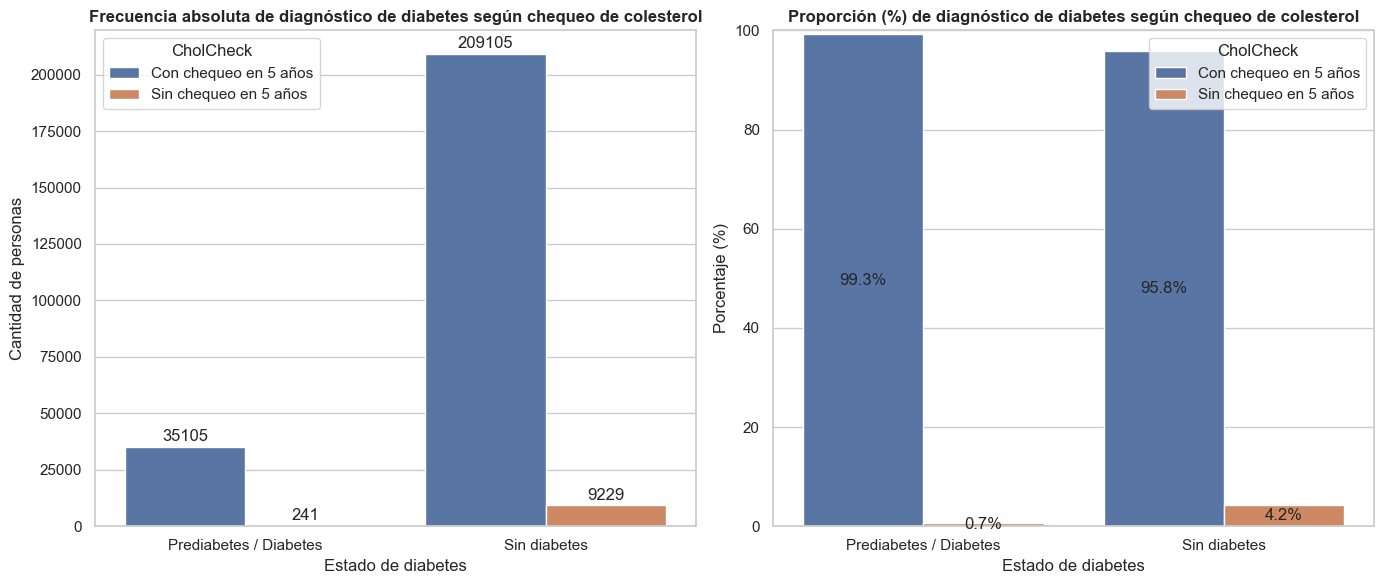

In [ ]:

plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs.iloc[:, :-1]   # quitar total
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Frecuencia")
)



fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue=variable,
    ax=axes[0]
)

ax1.set_title(f"Frecuencia absoluta de diagnóstico de diabetes según chequeo de colesterol",
              fontsize=12, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=12)


# ---- Proporciones ----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue=variable,
    ax=axes[1]
)

ax2.set_title(f"Proporción (%) de diagnóstico de diabetes según chequeo de colesterol",
              fontsize=12, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=12)

plt.tight_layout()
plt.show()

#### **8.1.4 Objetivo vs Smoker**

In [ ]:
variable = "Smoker" 

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz[variable])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz[variable],
    normalize="index"
) * 100

# Combinar frecuencia + porcentaje
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

print("Tabla de contingencia (Frecuencia y % por fila)")
display(tabla_final)

Tabla de contingencia (Frecuencia y % por fila)


Smoker,Fumador,No fumador,Total
Diabetes_binary,,,
Prediabetes / Diabetes,18317 (51.82%),17029 (48.18%),35346 (100%)
Sin diabetes,94106 (43.1%),124228 (56.9%),218334 (100%)


In [ ]:

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")

Chi-cuadrado: 937.06
Grados de libertad: 1
p-valor: 8.64017180994301e-206
Odds Ratio (OR): 1.42


La tabla de contingencia muestra diferencias en la distribución del hábito de fumar según el estado diabético. En el grupo con **Prediabetes / Diabetes**, el 51.82% reporta ser fumador, mientras que el 48.18% no fuma. En contraste, en el grupo **Sin diabetes**, el 43.10% es fumador y el 56.90% no lo es.

Esta diferencia porcentual sugiere una mayor proporción de fumadores dentro del grupo con alteraciones metabólicas. Desde el punto de vista estadístico, la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² =** 937.06, con 1 grado de libertad y un p-valor < 0.001, lo que indica evidencia estadísticamente significativa para rechazar la hipótesis nula de independencia entre el hábito de fumar y el estado diabético.

Adicionalmente, el Odds Ratio **(OR = 1.42)** indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente 1.42 veces mayores en fumadores en comparación con no fumadores. Aunque la magnitud del efecto es moderada, la asociación es consistente y estadísticamente robusta, lo cual es esperable dada la gran muestra analizada.

En consecuencia, se concluye que existe una asociación estadísticamente significativa entre el hábito de fumar y la presencia de prediabetes/diabetes en la muestra. Desde una perspectiva epidemiológica, este resultado es coherente con la literatura que vincula el tabaquismo con alteraciones metabólicas, inflamación sistémica y mayor riesgo de enfermedades crónicas.

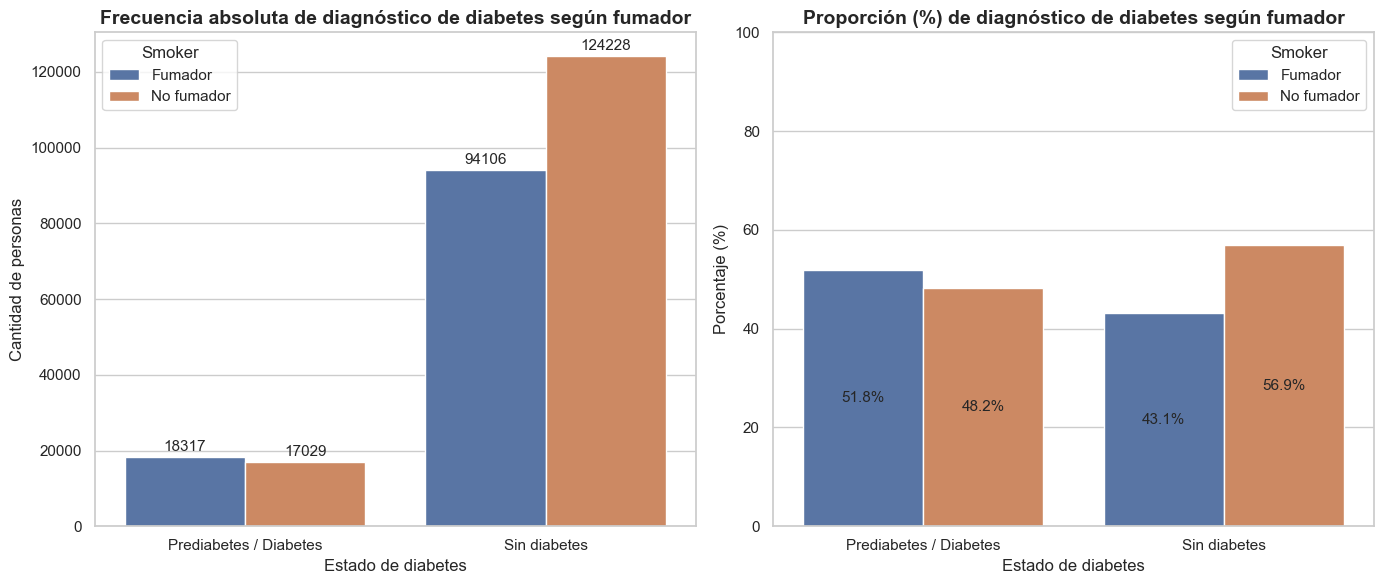

In [ ]:

plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs.iloc[:, :-1]  
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Frecuencia")
)



fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue=variable,
    ax=axes[0]
)

ax1.set_title(f"Frecuencia absoluta de diagnóstico de diabetes según fumador",
              fontsize=14, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=11)


# ---- ProporcioneS----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue=variable,
    ax=axes[1]
)

ax2.set_title(f"Proporción (%) de diagnóstico de diabetes según fumador",
              fontsize=14, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=11)

plt.tight_layout()
plt.show()

#### **8.1.5 Objetivo vs HeartDiseaseorAttack**

In [ ]:
variable = "HeartDiseaseorAttack"  

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz[variable])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz[variable],
    normalize="index"
) * 100

# Combinar frecuencia + porcentaje
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

print("Tabla de contingencia (Frecuencia y % por fila)")
display(tabla_final)

Tabla de contingencia (Frecuencia y % por fila)


HeartDiseaseorAttack,Con enfermedad cardíaca,Sin enfermedad cardíaca,Total
Diabetes_binary,,,
Prediabetes / Diabetes,7878 (22.29%),27468 (77.71%),35346 (100%)
Sin diabetes,16015 (7.34%),202319 (92.66%),218334 (100%)


In [ ]:

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")

Chi-cuadrado: 7971.16
Grados de libertad: 1
p-valor: 0.0
Odds Ratio (OR): 3.62


La tabla de contingencia evidencia una diferencia marcada en la prevalencia de enfermedad cardíaca o antecedente de infarto según el estado diabético. En el grupo con **Prediabetes / Diabetes**, el 22.29% reporta presentar enfermedad cardíaca, mientras que el 77.71% no la presenta. En contraste, dentro del grupo **Sin diabetes**, solo el 7.34% presenta enfermedad cardíaca y el 92.66% no la presenta.

Esta diferencia porcentual es sustancial y sugiere una fuerte asociación entre ambas condiciones. Desde el punto de vista estadístico, la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² = 7971.16**, con 1 grado de libertad y un p-valor < 0.001, lo que proporciona evidencia contundente para rechazar la hipótesis nula de independencia entre la presencia de enfermedad cardíaca y el estado diabético.

Adicionalmente, el Odds Ratio **(OR = 3.62)** indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente 3.6 veces mayores en individuos con enfermedad cardíaca o antecedente de infarto en comparación con aquellos sin esta condición. Este valor refleja una asociación de magnitud moderada a fuerte desde el punto de vista epidemiológico.

En consecuencia, se concluye que existe una asociación estadísticamente significativa y clínicamente relevante entre la presencia de enfermedad cardiovascular y el diagnóstico de prediabetes/diabetes en la muestra analizada. Este resultado es coherente con la literatura médica, que reconoce la diabetes como un factor de riesgo mayor para enfermedad cardiovascular y, a su vez, la coexistencia frecuente de ambas condiciones dentro del síndrome metabólico.

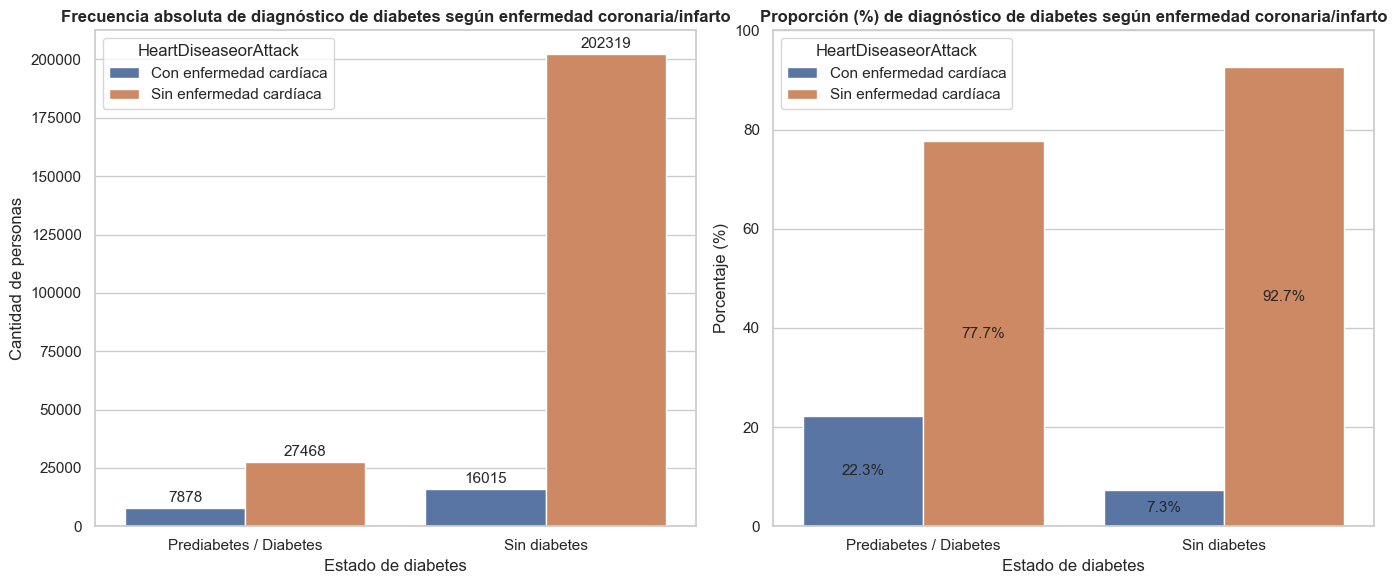

In [ ]:
plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs.iloc[:, :-1]   # quitar total
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Frecuencia")
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias  ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue=variable,
    ax=axes[0]
)

ax1.set_title(f"Frecuencia absoluta de diagnóstico de diabetes según enfermedad coronaria/infarto",
              fontsize=12, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=11)


# ---- Proporciones  ----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue=variable,
    ax=axes[1]
)

ax2.set_title(f"Proporción (%) de diagnóstico de diabetes según enfermedad coronaria/infarto",
              fontsize=12, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=11)

plt.tight_layout()
plt.show()

#### **8.1.6 Objetivo vs PhysActivity**

In [ ]:


variable = "PhysActivity"   

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz[variable])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz[variable],
    normalize="index"
) * 100

# Combinar frecuencia + porcentaje
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

print("Tabla de contingencia (Frecuencia y % por fila)")
display(tabla_final)

Tabla de contingencia (Frecuencia y % por fila)


PhysActivity,Con actividad física,Sin actividad física,Total
Diabetes_binary,,,
Prediabetes / Diabetes,22287 (63.05%),13059 (36.95%),35346 (100%)
Sin diabetes,169633 (77.69%),48701 (22.31%),218334 (100%)


In [ ]:

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")

Chi-cuadrado: 3539.42
Grados de libertad: 1
p-valor: 0.0
Odds Ratio (OR): 0.49


La tabla de contingencia muestra diferencias claras en la práctica de actividad física según el estado diabético. En el grupo con **Prediabetes / Diabetes**, el 63.05% reporta realizar actividad física, mientras que el 36.95% no la realiza. En contraste, dentro del grupo **Sin diabetes**, el 77.69% realiza actividad física y el 22.31% no lo hace.

Estas diferencias porcentuales sugieren que la inactividad física es más frecuente en el grupo con alteraciones metabólicas. Desde el punto de vista estadístico, la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² = 3539.42**, con 1 grado de libertad y un p-valor < 0.001, lo que proporciona evidencia suficiente para rechazar la hipótesis nula de independencia entre la actividad física y el estado diabético.

Adicionalmente, el Odds Ratio **(OR = 0.49)** indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente 51% menores en individuos que realizan actividad física en comparación con aquellos que no la realizan. Un OR menor que 1 sugiere un efecto protector de la actividad física frente a la presencia de alteraciones metabólicas.

En consecuencia, se concluye que existe una asociación estadísticamente significativa y clínicamente relevante entre la práctica de actividad física y el estado diabético en la muestra analizada. Este hallazgo es consistente con la evidencia epidemiológica, que reconoce la actividad física como un factor protector frente al desarrollo de diabetes tipo 2 y otras alteraciones metabólicas.

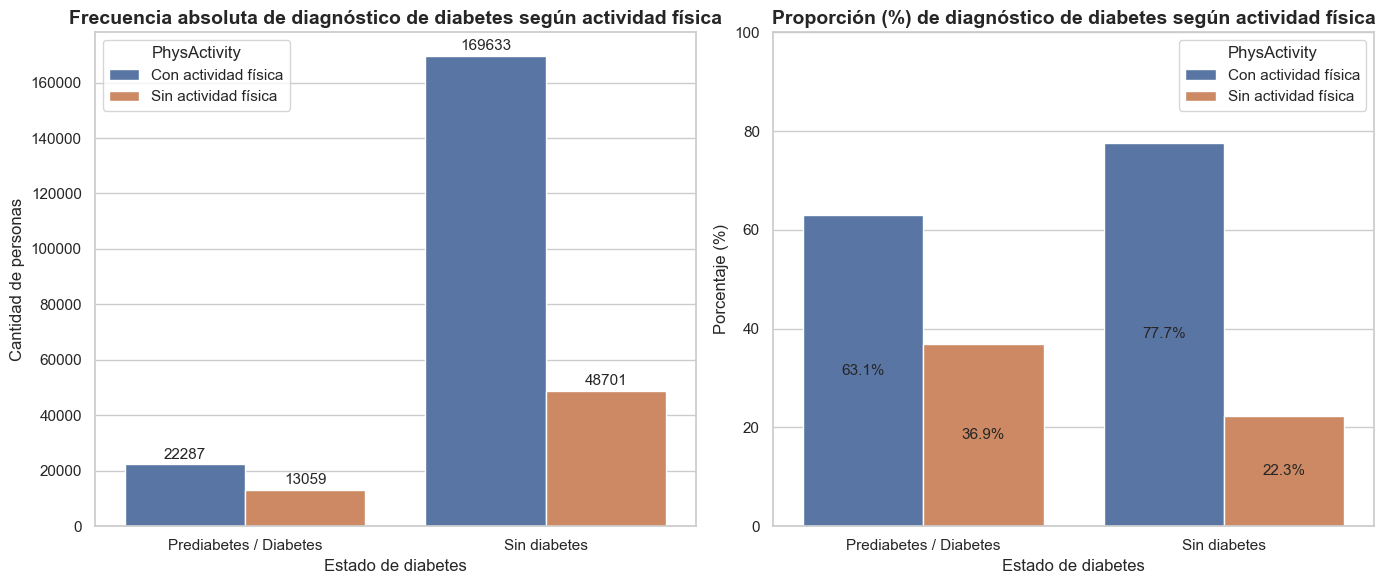

In [ ]:

plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs.iloc[:, :-1]   
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Frecuencia")
)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias  ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue=variable,
    ax=axes[0]
)

ax1.set_title(f"Frecuencia absoluta de diagnóstico de diabetes según actividad física",
              fontsize=14, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=11)


# ---- Proporciones----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue=variable,
    ax=axes[1]
)

ax2.set_title(f"Proporción (%) de diagnóstico de diabetes según actividad física",
              fontsize=14, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=11)

plt.tight_layout()
plt.show()

#### **8.1.7 Objetivo vs Fruits**

In [ ]:

variable = "Fruits"   

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz[variable])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz[variable],
    normalize="index"
) * 100

# Combinar frecuencia + porcentaje
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

print("Tabla de contingencia (Frecuencia y % por fila)")
display(tabla_final)

Tabla de contingencia (Frecuencia y % por fila)


Fruits,Consume frutas diario,No consume frutas diario,Total
Diabetes_binary,,,
Prediabetes / Diabetes,20693 (58.54%),14653 (41.46%),35346 (100%)
Sin diabetes,140205 (64.22%),78129 (35.78%),218334 (100%)


In [ ]:

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")

Chi-cuadrado: 421.61
Grados de libertad: 1
p-valor: 1.0881213885155634e-93
Odds Ratio (OR): 0.79


La tabla de contingencia muestra diferencias en el consumo diario de frutas según el estado diabético. En el grupo con **Prediabetes / Diabetes**, el 58.54% reporta consumir frutas diariamente, mientras que el 41.46% no lo hace. En contraste, en el grupo **Sin diabetes**, el 64.22% consume frutas diariamente y el 35.78% no lo hace.

Estas diferencias sugieren que el no consumo diario de frutas es ligeramente más frecuente en el grupo con alteraciones metabólicas. Desde el punto de vista estadístico, la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² = 421.61**, con 1 grado de libertad y un p-valor < 0.001, lo que indica que existe evidencia estadísticamente significativa para rechazar la hipótesis nula de independencia entre el consumo de frutas y el estado diabético.

Adicionalmente, el Odds Ratio **(OR = 0.79)** indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente 21% menores en individuos que consumen frutas diariamente en comparación con quienes no lo hacen. Al ser un OR menor que 1, sugiere un posible efecto protector leve asociado al consumo regular de frutas.

Sin embargo, aunque la asociación es estadísticamente significativa, la magnitud del efecto es moderada a baja en comparación con otras variables analizadas (como hipertensión o enfermedad cardíaca). En consecuencia, el consumo diario de frutas parece estar asociado con menor presencia de alteraciones metabólicas, pero su impacto relativo es menos fuerte que otros factores cardiometabólicos evaluados.

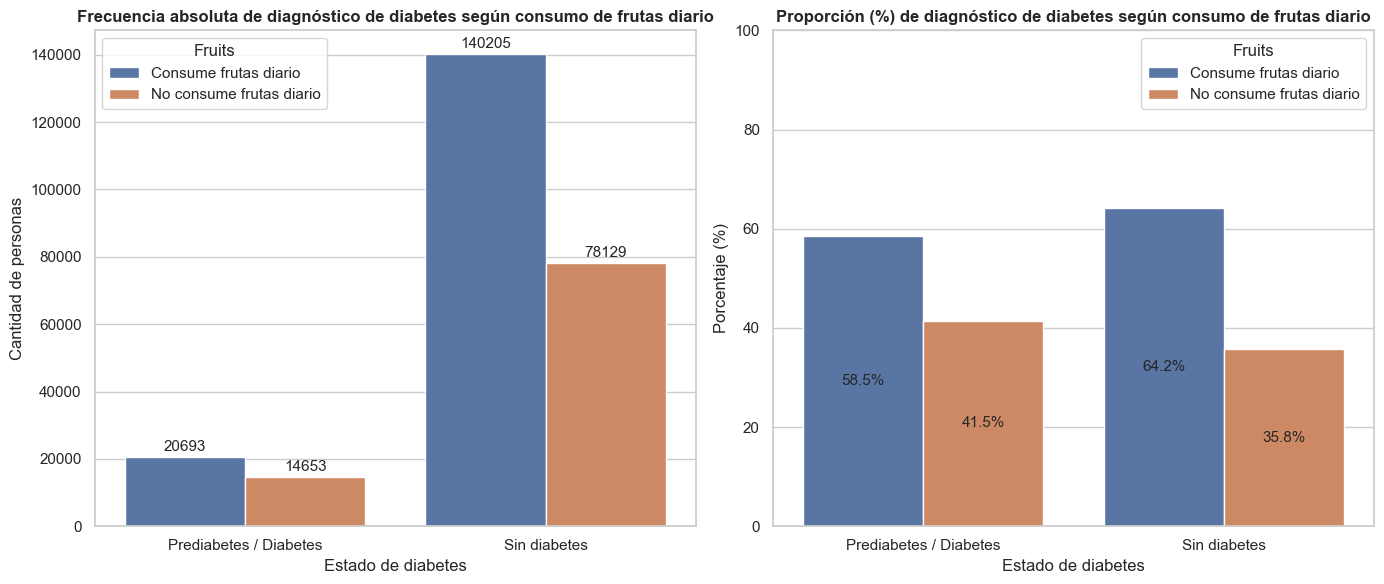

In [ ]:


plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs.iloc[:, :-1]   # quitar total
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Frecuencia")
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue=variable,
    ax=axes[0]
)

ax1.set_title(f"Frecuencia absoluta de diagnóstico de diabetes según consumo de frutas diario",
              fontsize=12, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=11)


# ---- Proporciones----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue=variable,
    ax=axes[1]
)

ax2.set_title(f"Proporción (%) de diagnóstico de diabetes según consumo de frutas diario",
              fontsize=12, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=11)

plt.tight_layout()
plt.show()

#### **8.1.8 Objetivo vs Veggies**

In [ ]:


variable = "Veggies"   

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz[variable])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz[variable],
    normalize="index"
) * 100

# Combinar frecuencia + porcentaje
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

print("Tabla de contingencia (Frecuencia y % por fila)")
display(tabla_final)

Tabla de contingencia (Frecuencia y % por fila)


Veggies,Consume verduras diario,No consume verduras diario,Total
Diabetes_binary,,,
Prediabetes / Diabetes,26736 (75.64%),8610 (24.36%),35346 (100%)
Sin diabetes,179105 (82.03%),39229 (17.97%),218334 (100%)


In [ ]:

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")

Chi-cuadrado: 811.81
Grados de libertad: 1
p-valor: 1.4630291539062376e-178
Odds Ratio (OR): 0.68


La tabla de contingencia muestra diferencias en el consumo diario de verduras según el estado diabético. En el grupo con **Prediabetes / Diabetes**, el 75.64% reporta consumir verduras diariamente, mientras que el 24.36% no lo hace. En contraste, dentro del grupo Sin diabetes, el 82.03% consume verduras diariamente y el 17.97% no lo hace.

Estas diferencias sugieren que el no consumo diario de verduras es más frecuente en el grupo con alteraciones metabólicas. Desde el punto de vista estadístico, la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² = 811.81**, con 1 grado de libertad y un p-valor < 0.001, lo que indica evidencia estadísticamente significativa para rechazar la hipótesis nula de independencia entre el consumo de verduras y el estado diabético.

Adicionalmente, el Odds Ratio **(OR = 0.68)** indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente 32% menores en individuos que consumen verduras diariamente en comparación con quienes no lo hacen. Al ser un OR menor que 1, este resultado sugiere un efecto protector moderado asociado al consumo regular de verduras.

En consecuencia, se concluye que existe una asociación estadísticamente significativa y epidemiológicamente relevante entre el consumo diario de verduras y la presencia de prediabetes/diabetes en la muestra analizada. Este hallazgo es coherente con la evidencia científica que vincula dietas ricas en vegetales con menor riesgo de alteraciones metabólicas y enfermedades crónicas.

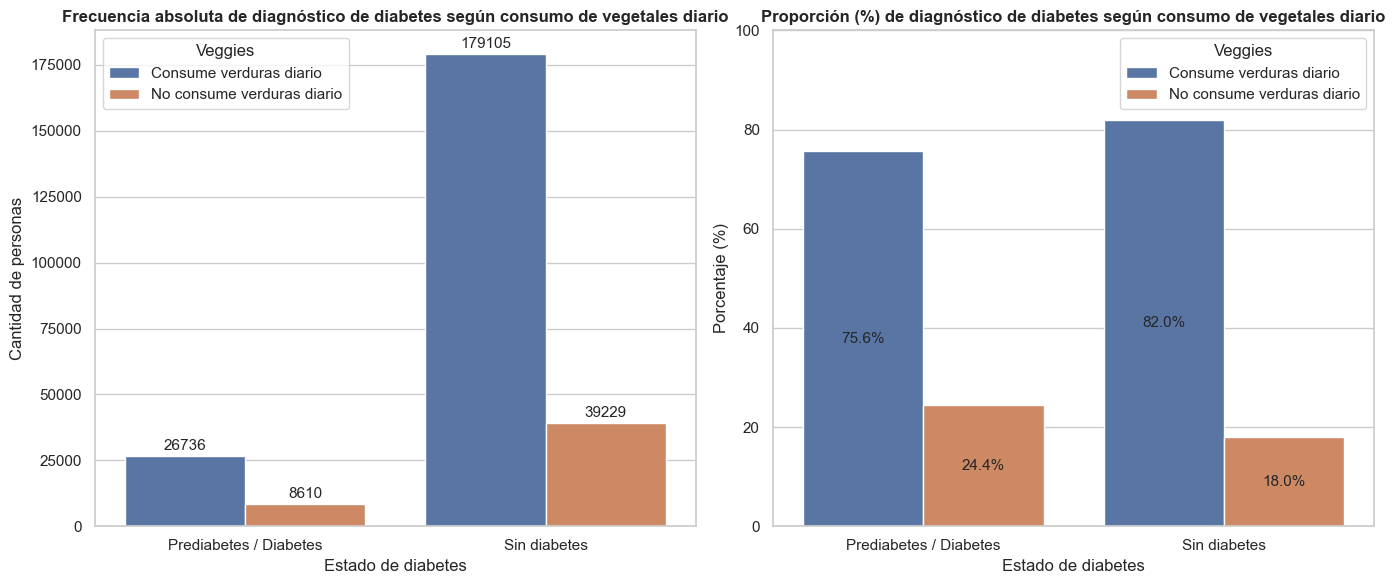

In [ ]:


plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs.iloc[:, :-1]  
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Frecuencia")
)



fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue=variable,
    ax=axes[0]
)

ax1.set_title(f"Frecuencia absoluta de diagnóstico de diabetes según consumo de vegetales diario",
              fontsize=12, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=11)


# ---- Proporciones ----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue=variable,
    ax=axes[1]
)

ax2.set_title(f"Proporción (%) de diagnóstico de diabetes según consumo de vegetales diario",
              fontsize=12, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=11)

plt.tight_layout()
plt.show()

#### **8.1.9 Objetivo vs HvyAlcoholConsump**

In [ ]:

variable = "HvyAlcoholConsump"   

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz[variable])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz[variable],
    normalize="index"
) * 100

# Combinar frecuencia + porcentaje
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

print("Tabla de contingencia (Frecuencia y % por fila)")
display(tabla_final)

Tabla de contingencia (Frecuencia y % por fila)


HvyAlcoholConsump,Consumo alto alcohol,No consumo alto alcohol,Total
Diabetes_binary,,,
Prediabetes / Diabetes,832 (2.35%),34514 (97.65%),35346 (100%)
Sin diabetes,13424 (6.15%),204910 (93.85%),218334 (100%)


In [ ]:

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")

Chi-cuadrado: 825.12
Grados de libertad: 1
p-valor: 1.8659318101056406e-181
Odds Ratio (OR): 0.37


La tabla de contingencia muestra diferencias en el consumo alto de alcohol según el estado diabético. En el grupo con **Prediabetes / Diabetes**, el 2.35% reporta consumo alto de alcohol, mientras que el 97.65% no presenta este patrón de consumo. En contraste, en el grupo Sin diabetes, el 6.15% reporta consumo alto de alcohol y el 93.85% no lo presenta.

A simple vista, el consumo alto de alcohol parece ser menos frecuente en el grupo con alteraciones metabólicas. Desde el punto de vista estadístico, la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² = 825.12**, con 1 grado de libertad y un p-valor < 0.001, lo que indica evidencia estadísticamente significativa para rechazar la hipótesis nula de independencia entre el consumo alto de alcohol y el estado diabético.

Adicionalmente, el Odds Ratio **(OR = 0.37)**indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente 63% menores en individuos con consumo alto de alcohol en comparación con aquellos que no presentan este patrón de consumo. Sin embargo, este resultado debe interpretarse con cautela. Un OR menor que 1 no implica necesariamente que el consumo alto de alcohol sea protector; más bien, podría reflejar factores de confusión, cambios en el comportamiento tras el diagnóstico (reducción del consumo después de ser diagnosticado) o sesgos asociados al autorreporte.

En consecuencia, aunque existe una asociación estadísticamente significativa entre el consumo alto de alcohol y el estado diabético en la muestra analizada, la dirección aparente del efecto debe analizarse con prudencia desde el punto de vista epidemiológico y no debe interpretarse como un efecto protector causal.

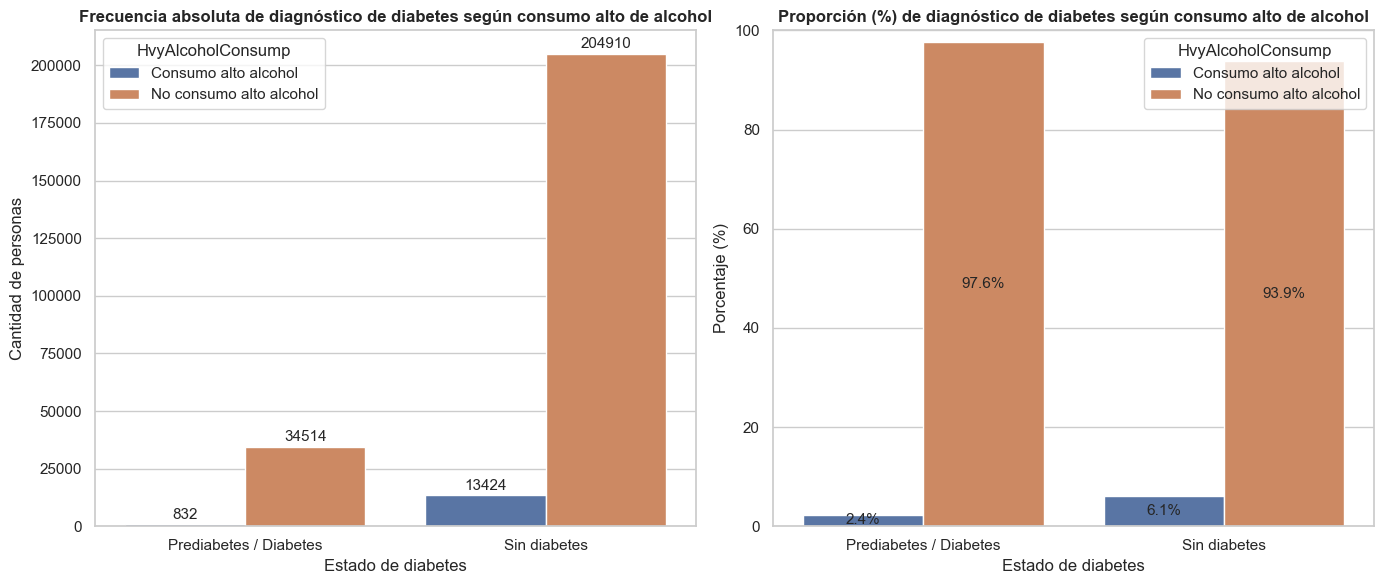

In [ ]:


plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs.iloc[:, :-1]   
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Frecuencia")
)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue=variable,
    ax=axes[0]
)

ax1.set_title(f"Frecuencia absoluta de diagnóstico de diabetes según consumo alto de alcohol",
              fontsize=12, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=11)


# ---- Proporciones ----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue=variable,
    ax=axes[1]
)

ax2.set_title(f"Proporción (%) de diagnóstico de diabetes según consumo alto de alcohol",
              fontsize=12, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=11)

plt.tight_layout()
plt.show()

#### **8.1.10 Objetivo vs AnyHealthcare**

In [ ]:


variable = "AnyHealthcare"  

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz[variable])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz[variable],
    normalize="index"
) * 100

# Combinar frecuencia + porcentaje
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

print("Tabla de contingencia (Frecuencia y % por fila)")
display(tabla_final)

Tabla de contingencia (Frecuencia y % por fila)


AnyHealthcare,Con cobertura médica,Sin cobertura médica,Total
Diabetes_binary,,,
Prediabetes / Diabetes,33924 (95.98%),1422 (4.02%),35346 (100%)
Sin diabetes,207339 (94.96%),10995 (5.04%),218334 (100%)


In [ ]:

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")

Chi-cuadrado: 66.81
Grados de libertad: 1
p-valor: 2.986181073970452e-16
Odds Ratio (OR): 1.27


La tabla de contingencia muestra diferencias leves en la cobertura médica según el estado diabético. En el grupo con **Prediabetes / Diabetes**, el 95.98% reporta contar con cobertura médica, mientras que el 4.02% no la tiene. En contraste, dentro del grupo **Sin diabetes**, el 94.96% tiene cobertura y el 5.04% no la tiene.

Aunque la diferencia porcentual es pequeña (aproximadamente 1 punto porcentual), la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² = 66.81**, con 1 grado de libertad y un p-valor < 0.001, lo que indica que la asociación es estadísticamente significativa. Sin embargo, dado el gran tamaño muestral, incluso diferencias pequeñas pueden resultar significativas desde el punto de vista estadístico.

El Odds Ratio **(OR = 1.27)** indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente 27% mayores en individuos con cobertura médica en comparación con quienes no la tienen. Este resultado no debe interpretarse como que la cobertura médica aumente el riesgo; más bien, probablemente refleja un mayor acceso al diagnóstico y al sistema de salud en personas que cuentan con cobertura, lo que incrementa la probabilidad de detección de la enfermedad.

En consecuencia, aunque existe una asociación estadísticamente significativa entre la cobertura médica y el estado diabético en la muestra analizada, la magnitud del efecto es baja y su interpretación debe contextualizarse en términos de acceso a servicios de salud y detección oportuna, más que como un factor de riesgo causal.

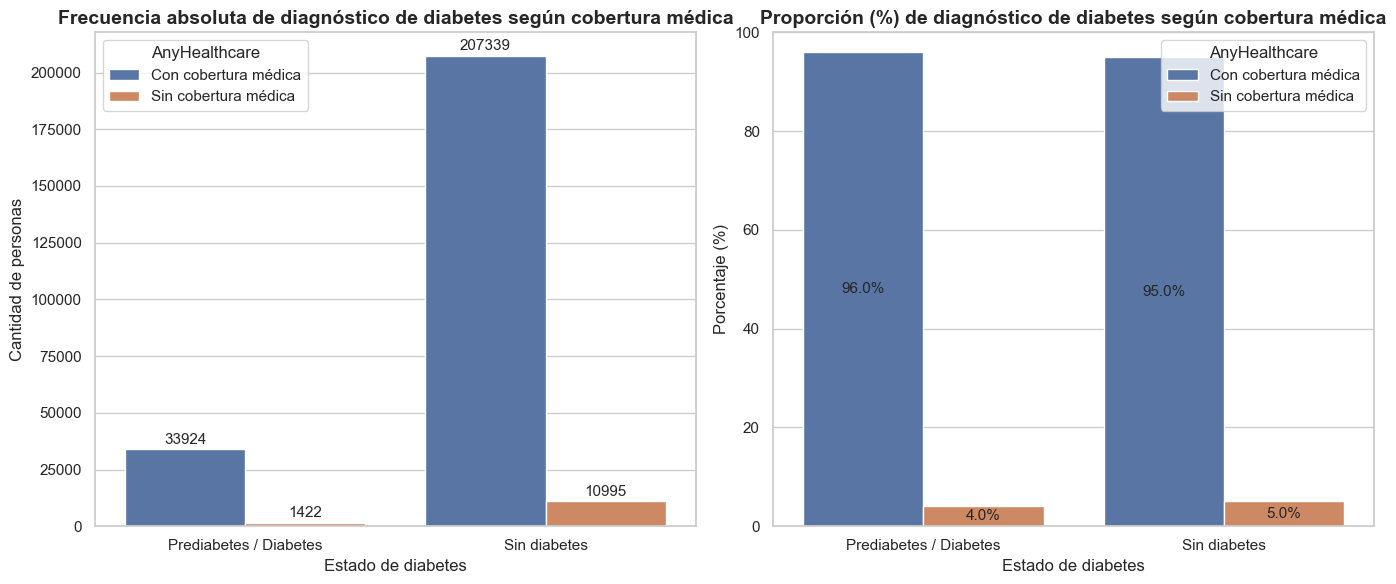

In [ ]:


plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs.iloc[:, :-1]   
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Frecuencia")
)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias  ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue=variable,
    ax=axes[0]
)

ax1.set_title(f"Frecuencia absoluta de diagnóstico de diabetes según cobertura médica",
              fontsize=14, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=11)


# ---- Proporciones ----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue=variable,
    ax=axes[1]
)

ax2.set_title(f"Proporción (%) de diagnóstico de diabetes según cobertura médica",
              fontsize=14, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=11)

plt.tight_layout()
plt.show()

#### **8.1.11 Objetivo vs NoDocbcCost**

In [ ]:


variable = "NoDocbcCost"  

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz[variable])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz[variable],
    normalize="index"
) * 100

# Combinar frecuencia + porcentaje
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

print("Tabla de contingencia (Frecuencia y % por fila)")
display(tabla_final)

Tabla de contingencia (Frecuencia y % por fila)


NoDocbcCost,Con barrera económica,Sin barrera económica,Total
Diabetes_binary,,,
Prediabetes / Diabetes,3742 (10.59%),31604 (89.41%),35346 (100%)
Sin diabetes,17612 (8.07%),200722 (91.93%),218334 (100%)


In [ ]:

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")

Chi-cuadrado: 250.31
Grados de libertad: 1
p-valor: 2.218395410122378e-56
Odds Ratio (OR): 1.35


La tabla de contingencia muestra diferencias en la presencia de barreras económicas para acceder a servicios médicos según el estado diabético. En el grupo con **Prediabetes / Diabetes**, el 10.59% reporta haber tenido una barrera económica para consultar al médico, mientras que el 89.41% no la reporta. En contraste, en el grupo **Sin diabetes**, el 8.07% presenta esta barrera y el 91.93% no la presenta.

Estas diferencias sugieren que las barreras económicas para el acceso a la atención médica son ligeramente más frecuentes en el grupo con alteraciones metabólicas. Desde el punto de vista estadístico, la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² = 250.31**, con 1 grado de libertad y un p-valor < 0.001, lo que indica que existe evidencia estadísticamente significativa para rechazar la hipótesis nula de independencia entre la presencia de barreras económicas y el estado diabético.

El Odds Ratio **(OR = 1.35)** indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente 35% mayores en individuos que reportan barreras económicas para acceder al médico, en comparación con aquellos que no las reportan. Aunque la magnitud del efecto es moderada, el resultado sugiere una asociación relevante desde el punto de vista social y estructural.

En consecuencia, se concluye que existe una asociación estadísticamente significativa entre las barreras económicas en el acceso a la atención médica y el estado diabético en la muestra analizada. Este hallazgo puede reflejar desigualdades en el acceso a servicios preventivos y de control, lo que podría influir tanto en el diagnóstico oportuno como en el manejo adecuado de la enfermedad.

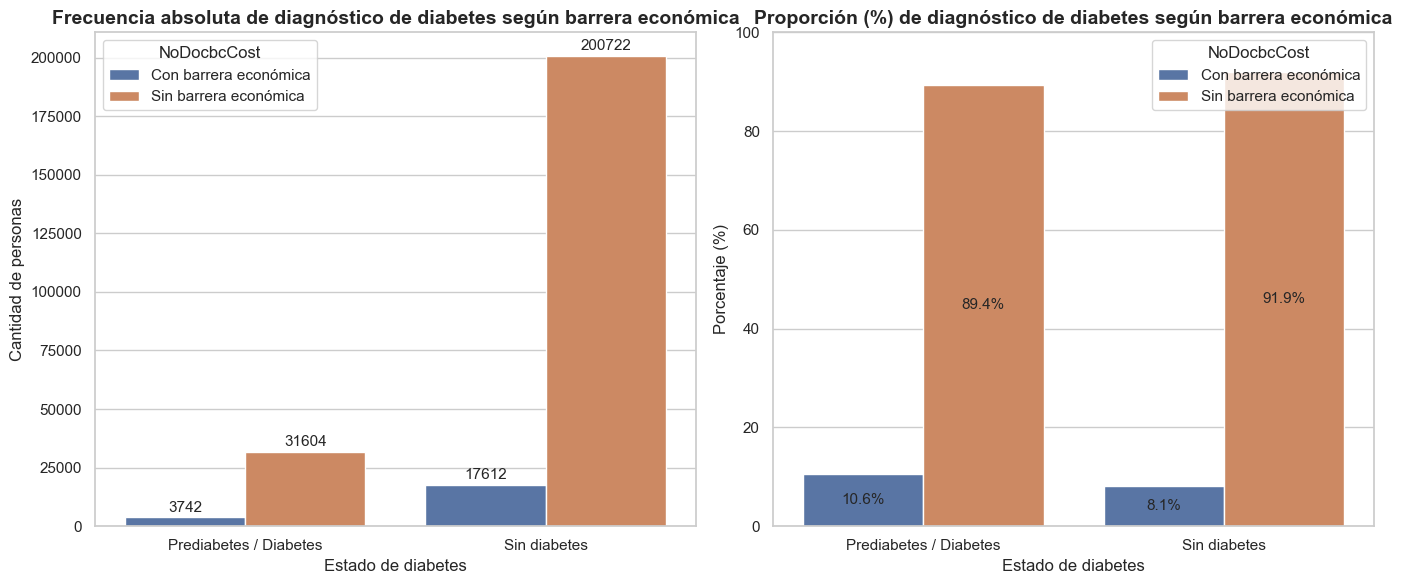

In [ ]:


plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs.iloc[:, :-1]   
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Frecuencia")
)



fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue=variable,
    ax=axes[0]
)

ax1.set_title(f"Frecuencia absoluta de diagnóstico de diabetes según barrera económica",
              fontsize=14, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=11)


# ---- Proporciones ----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue=variable,
    ax=axes[1]
)

ax2.set_title(f"Proporción (%) de diagnóstico de diabetes según barrera económica",
              fontsize=14, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=11)

plt.tight_layout()
plt.show()

#### **8.1.12 Objetivo vs DiffWalk**

In [ ]:

variable = "DiffWalk"   

# Tabla absoluta
tabla_abs = pd.crosstab(df_viz["Diabetes_binary"], df_viz[variable])

# Tabla porcentual por fila
tabla_pct = pd.crosstab(
    df_viz["Diabetes_binary"],
    df_viz[variable],
    normalize="index"
) * 100

# Combinar frecuencia + porcentaje
tabla_final = tabla_abs.astype(str) + " (" + tabla_pct.round(2).astype(str) + "%)"

# Agregar totales
tabla_abs["Total"] = tabla_abs.sum(axis=1)
tabla_final["Total"] = tabla_abs["Total"].astype(str) + " (100%)"

print("Tabla de contingencia (Frecuencia y % por fila)")
display(tabla_final)

Tabla de contingencia (Frecuencia y % por fila)


DiffWalk,Con dificultad al caminar,Sin dificultad al caminar,Total
Diabetes_binary,,,
Prediabetes / Diabetes,13121 (37.12%),22225 (62.88%),35346 (100%)
Sin diabetes,29554 (13.54%),188780 (86.46%),218334 (100%)


In [ ]:

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs.iloc[:, :-1])

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Odds Ratio
# Calcular Odds Ratio solo si es tabla 2x2
if tabla_abs.iloc[:, :-1].shape == (2, 2):
    
    a = tabla_abs.iloc[0, 0]
    b = tabla_abs.iloc[0, 1]
    c = tabla_abs.iloc[1, 0]
    d = tabla_abs.iloc[1, 1]
    
    odds_ratio = (a * d) / (b * c)
    print("Odds Ratio (OR):", round(odds_ratio, 2))
    
else:
    print("Odds Ratio no aplica (tabla mayor a 2x2)")

Chi-cuadrado: 12092.32
Grados de libertad: 1
p-valor: 0.0
Odds Ratio (OR): 3.77


La tabla de contingencia evidencia una diferencia marcada en la presencia de dificultad para caminar según el estado diabético. En el grupo con **Prediabetes / Diabetes**, el 37.12% reporta presentar dificultad al caminar, mientras que el 62.88% no la presenta. En contraste, dentro del grupo Sin diabetes, solo el 13.54% reporta dificultad al caminar y el 86.46% no presenta esta condición.

La diferencia porcentual es considerable (más de 23 puntos porcentuales), lo que sugiere una asociación fuerte entre ambas variables. Desde el punto de vista estadístico, la prueba de independencia Chi-cuadrado arroja un estadístico de **χ² = 12092.32**, con 1 grado de libertad y un p-valor < 0.001, lo que indica evidencia altamente significativa para rechazar la hipótesis nula de independencia entre la dificultad para caminar y el estado diabético.

Adicionalmente, el Odds Ratio **(OR = 3.77)** indica que las probabilidades de presentar prediabetes/diabetes son aproximadamente 3.8 veces mayores en individuos que reportan dificultad para caminar en comparación con quienes no la presentan. Este valor refleja una asociación de magnitud fuerte desde el punto de vista epidemiológico.

En consecuencia, se concluye que existe una asociación estadísticamente significativa y clínicamente relevante entre la dificultad para caminar y el diagnóstico de prediabetes/diabetes en la muestra analizada. Este hallazgo es coherente con la literatura, ya que la diabetes se asocia frecuentemente con complicaciones como neuropatía periférica, alteraciones vasculares y limitaciones funcionales que pueden afectar la movilidad.

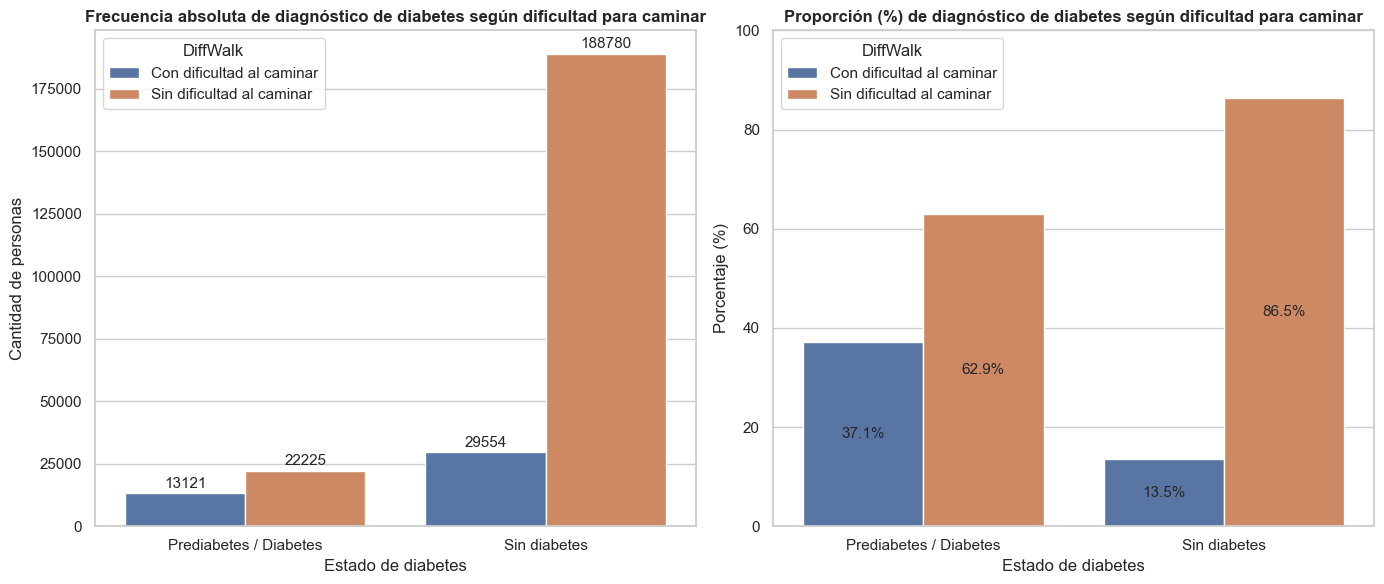

In [ ]:


plot_pct = (
    tabla_pct
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Porcentaje")
)

plot_abs = (
    tabla_abs.iloc[:, :-1]
    .reset_index()
    .melt(id_vars="Diabetes_binary",
          var_name=variable,
          value_name="Frecuencia")
)



fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Frecuencias ----
ax1 = sns.barplot(
    data=plot_abs,
    x="Diabetes_binary",
    y="Frecuencia",
    hue=variable,
    ax=axes[0]
)

ax1.set_title(f"Frecuencia absoluta de diagnóstico de diabetes según dificultad para caminar",
              fontsize=12, fontweight="bold")
ax1.set_xlabel("Estado de diabetes")
ax1.set_ylabel("Cantidad de personas")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.0f", padding=2, fontsize=11)


# ---- Proporciones ----
ax2 = sns.barplot(
    data=plot_pct,
    x="Diabetes_binary",
    y="Porcentaje",
    hue=variable,
    ax=axes[1]
)

ax2.set_title(f"Proporción (%) de diagnóstico de diabetes según dificultad para caminar",
              fontsize=12, fontweight="bold")
ax2.set_xlabel("Estado de diabetes")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_ylim(0, 100)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=11)

plt.tight_layout()
plt.show()

### **8.2 Variable objetivo vs variables categóricas ordinales**

#### **8.2.1 Objetivo vs GenHlth**

In [ ]:


genhlth_labels = {
    1: "Excelente",
    2: "Muy buena",
    3: "Buena",
    4: "Regular",
    5: "Mala"
}

# Asegurar códigos 1-5
inv_genhlth = {v: k for k, v in genhlth_labels.items()}

gen = df_viz["GenHlth"]

if gen.dtype.name == "category" or gen.dtype == object:
    gen_codes = gen.map(inv_genhlth)
else:
    gen_codes = gen

# Tabla absoluta
tabla_abs = pd.crosstab(gen_codes, df_viz["Diabetes_binary"])
tabla_abs = tabla_abs.reindex([1,2,3,4,5])

# Totales
total_general = tabla_abs.sum(axis=1)
n_total = total_general.sum()

# Porcentajes por grupo
tabla_pct_col = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# Porcentaje total
pct_total = (total_general / n_total) * 100

# Asegurar nombres correctos (orden fijo)
no_col = "Sin diabetes"
si_col = "Prediabetes / Diabetes"

# Construir tabla final
tabla_genhlth_final = pd.DataFrame({
    "Código": [1,2,3,4,5],
    "Descripción": [genhlth_labels[i] for i in [1,2,3,4,5]],
    "Sin diabetes (N)": tabla_abs[no_col].values,
    "Sin diabetes (%)": tabla_pct_col[no_col].round(2).values,
    "Prediabetes/Diabetes (N)": tabla_abs[si_col].values,
    "Prediabetes/Diabetes (%)": tabla_pct_col[si_col].round(2).values,
    "Total (N)": total_general.values,
    "Total (%)": pct_total.round(2).values
})

display(tabla_genhlth_final.style.hide(axis="index"))

Código,Descripción,Sin diabetes (N),Sin diabetes (%),Prediabetes/Diabetes (N),Prediabetes/Diabetes (%),Total (N),Total (%)
1,Excelente,44159,20.230000,1140,3.230000,45299,17.860000
2,Muy buena,82703,37.880000,6381,18.050000,89084,35.120000
3,Buena,62189,28.480000,13457,38.070000,75646,29.820000
4,Regular,21780,9.980000,9790,27.700000,31570,12.440000
5,Mala,7503,3.440000,4578,12.950000,12081,4.760000


In [ ]:


# Tabla absoluta 
tabla_chi = pd.crosstab(gen_codes, df_viz["Diabetes_binary"])

chi2, p, dof, expected = chi2_contingency(tabla_chi)

print("Chi-cuadrado:", round(chi2,2))
print("Grados de libertad:", dof)
print("p-valor:", p)

n = tabla_chi.sum().sum()

cramers_v = np.sqrt(chi2 / (n * (min(tabla_chi.shape)-1)))

print("Cramér's V:", round(cramers_v,3))

Chi-cuadrado: 22728.07
Grados de libertad: 4
p-valor: 0.0
Cramér's V: 0.299


En ``GenHlth``, la distribución cambia fuerte entre grupos. En el grupo Sin diabetes, la mayor parte se concentra en categorías favorables: “Muy buena” (37.88%) y “Excelente” (20.23%), mientras que “Mala” representa solo 3.44%. En contraste, en Prediabetes/Diabetes la categoría más frecuente es “Buena” (38.07%), y aparecen proporciones mucho más altas en estados menos favorables: “Regular” (27.70%) y “Mala” (12.95%), mientras que “Excelente” baja a 3.23%. Esto evidencia un desplazamiento desde categorías “mejores” hacia categorías “peores” en quienes tienen prediabetes/diabetes.

La prueba Chi-cuadrado de independencia arroja un estadístico ``χ² = 22 728.07`` con 4 grados de libertad y un p-valor < 0.001, lo que indica que existe una asociación estadísticamente significativa entre el estado de salud general (GenHlth) y la presencia de prediabetes/diabetes. En consecuencia, se rechaza la hipótesis nula de independencia entre las variables.

El tamaño del efecto, medido mediante Cramér’s ``V = 0.299``, sugiere una asociación de magnitud moderada. Esto implica que la relación no solo es significativa por el gran tamaño muestral, sino que también presenta relevancia práctica.

En términos sustantivos, la distribución muestra un desplazamiento claro: las personas con prediabetes/diabetes se concentran en mayor proporción en las categorías “Regular” y “Mala”, mientras que el grupo sin diabetes presenta mayor frecuencia en “Excelente” y “Muy buena”. En conjunto, la evidencia respalda que un peor estado de salud general se asocia de manera consistente con el estado diabético.

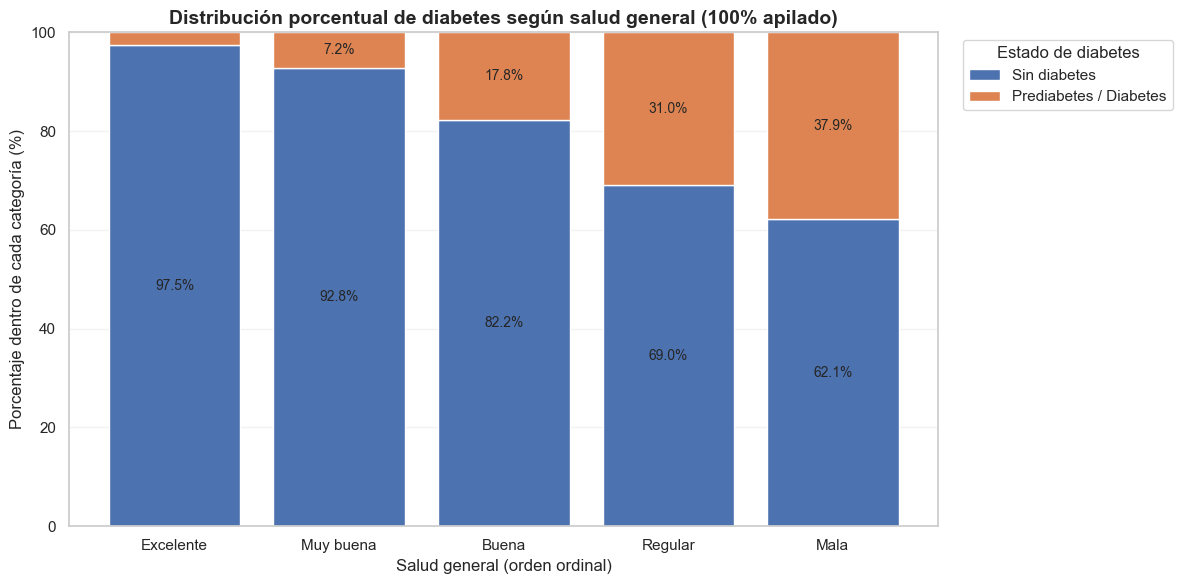

In [ ]:


# Orden correcto
orden_gen = ["Excelente", "Muy buena", "Buena", "Regular", "Mala"]

map_gen = {1:"Excelente", 2:"Muy buena", 3:"Buena", 4:"Regular", 5:"Mala"}

gen = df_viz["GenHlth"].copy()

# Si viene numérica, convertir a etiquetas
gen_num = pd.to_numeric(gen, errors="coerce")
if gen_num.notna().any():
    gen = gen_num.map(map_gen).fillna(gen)

# ===============================
# 100% dentro de cada categoría
# ===============================
tabla_pct = pd.crosstab(
    gen,
    df_viz["Diabetes_binary"],
    normalize="index"
) * 100

tabla_pct = tabla_pct.reindex(orden_gen)

cols_order = [c for c in ["Sin diabetes", "Prediabetes / Diabetes"] if c in tabla_pct.columns]
if len(cols_order) == 0:
    cols_order = tabla_pct.columns.tolist()

tabla_pct = tabla_pct[cols_order]

# ====== Gráfico ======
fig, ax = plt.subplots(figsize=(12, 6))

bottom = np.zeros(len(tabla_pct))
x = np.arange(len(tabla_pct.index))

for col in tabla_pct.columns:
    bars = ax.bar(tabla_pct.index, tabla_pct[col], bottom=bottom, label=col)

    # Etiquetas
    for i, b in enumerate(bars):
        val = tabla_pct[col].iloc[i]
        if val >= 3:  # evita ruido visual
            ax.text(
                b.get_x() + b.get_width()/2,
                bottom[i] + val/2,
                f"{val:.1f}%",
                ha="center",
                va="center",
                fontsize=10
            )
    bottom += tabla_pct[col].values

ax.set_title("Distribución porcentual de diabetes según salud general",
             fontsize=14, fontweight="bold")

ax.set_ylabel("Porcentaje dentro de cada categoría (%)")
ax.set_xlabel("Salud general (orden ordinal)")
ax.set_ylim(0, 100)

ax.grid(axis="y", alpha=0.25)
ax.set_axisbelow(True)

ax.legend(title="Estado de diabetes", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

#### **8.2.2 Objetivo vs Age**

In [ ]:


# 1) Mapeo oficial (código -> descripción)
age_labels = {
    1: "18–24", 2: "25–29", 3: "30–34", 4: "35–39",
    5: "40–44", 6: "45–49", 7: "50–54", 8: "55–59",
    9: "60–64", 10: "65–69", 11: "70–74", 12: "75–79", 13: "80+"
}

# 2) Normalizar Age a código 1..13 en una columna auxiliar
#    - si ya viene numérica 1..13: se queda igual
#    - si viene como texto ("18-24", "18–24", "80+"): se convierte usando mapeo inverso
age_inverse = {v.replace("–", "-"): k for k, v in age_labels.items()}
age_inverse.update({v: k for k, v in age_labels.items()})  # por si ya trae “–”

# Crear Age_code robusto
if pd.api.types.is_numeric_dtype(df_viz["Age"]):
    df_viz["Age_code"] = df_viz["Age"].astype(int)
else:
    df_viz["Age_code"] = (
        df_viz["Age"]
        .astype(str)
        .str.strip()
        .str.replace("–", "-", regex=False)   # normaliza guion
        .map(age_inverse)
    )

# (Opcional) si quieres ver si hay valores sin mapear:
# print("No mapeados:", df_viz["Age_code"].isna().sum())

# 3) Tabla absoluta (por código)
tabla_abs = pd.crosstab(df_viz["Age_code"], df_viz["Diabetes_binary"]).sort_index()

# 4) Porcentajes por columna (distribución dentro de cada grupo)
tabla_pct = pd.crosstab(df_viz["Age_code"], df_viz["Diabetes_binary"], normalize="columns") * 100
tabla_pct = tabla_pct.reindex(tabla_abs.index)

# 5) Totales
total_abs = tabla_abs.sum(axis=1)
total_pct = (total_abs / total_abs.sum()) * 100

# 6) Armar salida final
col_no = "Sin diabetes"
col_si = "Prediabetes / Diabetes"

salida = pd.DataFrame({
    "Código": tabla_abs.index.astype(int),
    "Descripción": tabla_abs.index.astype(int).map(age_labels),

    "Sin diabetes (N)": tabla_abs.get(col_no, 0).values,
    "Sin diabetes (%)": tabla_pct.get(col_no, 0).round(2).values,

    "Prediabetes/Diabetes (N)": tabla_abs.get(col_si, 0).values,
    "Prediabetes/Diabetes (%)": tabla_pct.get(col_si, 0).round(2).values,

    "Total (N)": total_abs.values,
    "Total (%)": total_pct.round(2).values
}).reset_index(drop=True)

# 7) Mostrar sin el index de la izquierda (visual)
display(salida.style.hide(axis="index"))

Código,Descripción,Sin diabetes (N),Sin diabetes (%),Prediabetes/Diabetes (N),Prediabetes/Diabetes (%),Total (N),Total (%)
1,18–24,5622,2.570000,78,0.220000,5700,2.250000
2,25–29,7458,3.420000,140,0.400000,7598,3.000000
3,30–34,10809,4.950000,314,0.890000,11123,4.380000
4,35–39,13197,6.040000,626,1.770000,13823,5.450000
5,40–44,15106,6.920000,1051,2.970000,16157,6.370000
6,45–49,18077,8.280000,1742,4.930000,19819,7.810000
7,50–54,23226,10.640000,3088,8.740000,26314,10.370000
8,55–59,26569,12.170000,4263,12.060000,30832,12.150000
9,60–64,27511,12.600000,5733,16.220000,33244,13.100000
10,65–69,25636,11.740000,6558,18.550000,32194,12.690000


In [ ]:

tabla_chi = pd.crosstab(df_viz["Age_code"], df_viz["Diabetes_binary"]).sort_index()

chi2, p, dof, expected = chi2_contingency(tabla_chi)

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

# Tamaño del efecto: Cramér's V
n = tabla_chi.to_numpy().sum()
k = min(tabla_chi.shape) - 1  # min(r-1, c-1) para Cramér
cramers_v = np.sqrt(chi2 / (n * k)) if k > 0 else np.nan

print("Cramér's V:", round(cramers_v, 3))

Chi-cuadrado: 8795.05
Grados de libertad: 12
p-valor: 0.0
Cramér's V: 0.186


En relación con la variable grupo de ``edad``, la distribución descriptiva evidencia un incremento progresivo en la proporción de individuos con prediabetes/diabetes a medida que aumenta la edad. Mientras que en los grupos más jóvenes (18–24 y 25–29) la frecuencia de casos es considerablemente baja, a partir de los 45 años se observa un aumento sostenido, alcanzando sus valores más elevados entre los 60 y 74 años, donde la proporción de individuos con condición diabética supera ampliamente la observada en edades tempranas. 

La prueba de independencia Chi-cuadrado confirmó que esta asociación es estadísticamente significativa ``(χ²=8795.05; gl=12; p<0.001)``. Asimismo, el tamaño del efecto medido mediante Cramér’s V ``(V=0.186)`` indica una asociación de magnitud pequeña a moderada, lo que sugiere que, aunque la edad no determina por sí sola el estado diabético, sí constituye un factor estructural relevante en su distribución poblacional.
 
Estos resultados son coherentes con la evidencia epidemiológica que identifica el envejecimiento como un determinante importante del riesgo de diabetes tipo 2.

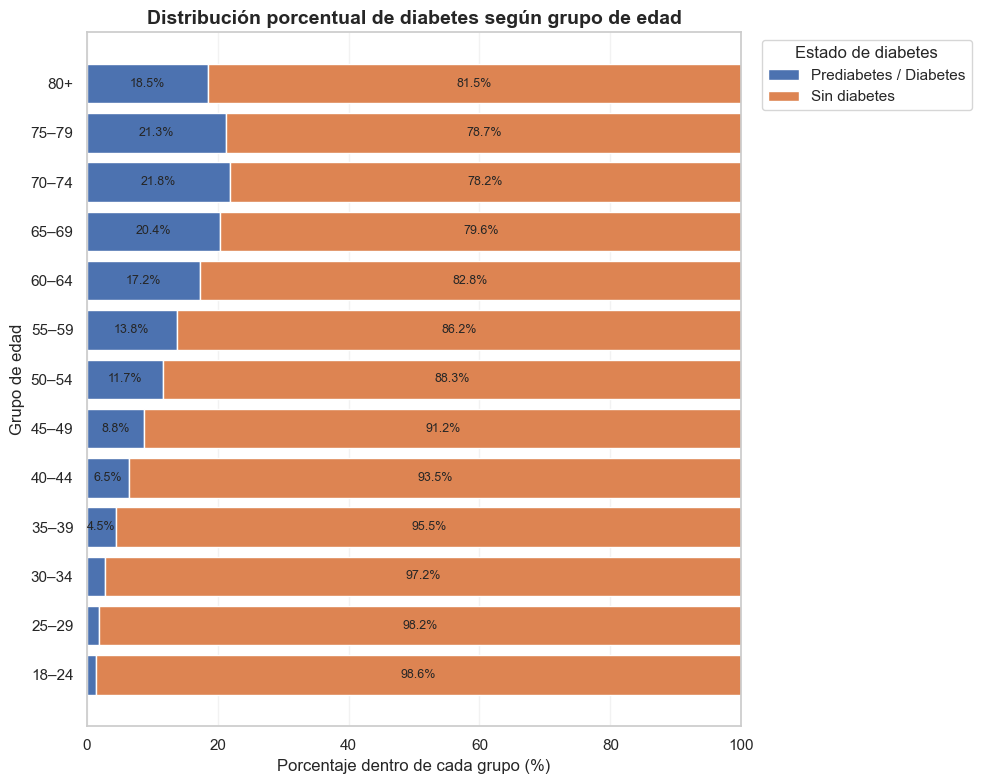

In [ ]:

# Mapeo códigos -> etiqueta
age_labels = {
    1: "18–24", 2: "25–29", 3: "30–34", 4: "35–39",
    5: "40–44", 6: "45–49", 7: "50–54", 8: "55–59",
    9: "60–64", 10: "65–69", 11: "70–74",
    12: "75–79", 13: "80+"
}

# Tabla porcentual por edad (cada fila suma 100%)
tabla_pct = pd.crosstab(
    df_viz["Age_code"],
    df_viz["Diabetes_binary"],
    normalize="index"
) * 100

tabla_pct = tabla_pct.sort_index()

# Convertir índice a etiquetas
tabla_pct.index = tabla_pct.index.map(age_labels)

# ===== Gráfico horizontal =====
fig, ax = plt.subplots(figsize=(10, 8))

left = np.zeros(len(tabla_pct))

for col in tabla_pct.columns:
    bars = ax.barh(
        tabla_pct.index,
        tabla_pct[col],
        left=left,
        label=col
    )
    
    # Etiquetas porcentuales dentro de cada segmento
    for i, val in enumerate(tabla_pct[col]):
        if val > 3:  # evita etiquetas muy pequeñas
            ax.text(
                left[i] + val / 2,
                i,
                f"{val:.1f}%",
                va="center",
                ha="center",
                fontsize=9
            )
    
    left += tabla_pct[col].values

ax.set_title("Distribución porcentual de diabetes según grupo de edad",
             fontsize=14, fontweight="bold")

ax.set_xlabel("Porcentaje dentro de cada grupo (%)")
ax.set_ylabel("Grupo de edad")
ax.set_xlim(0, 100)

ax.legend(title="Estado de diabetes", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.grid(axis="x", alpha=0.25)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

#### **8.2.3 Objetivo vs Education**

In [272]:

# 1) Asegurar orden correcto (según TU mapping)
education_order = [
    "Nunca asistió",
    "Primaria incompleta",
    "Secundaria incompleta",
    "Secundaria completa / GED",
    "Universidad incompleta",
    "Universidad completa"
]

# 2) Tomar la variable ya categórica (texto)
edu = df_viz["Education"].astype("category")

# (opcional pero recomendado) forzar el orden
edu = edu.cat.reorder_categories(education_order, ordered=True)

# 3) Tabla absoluta (con labels)
tabla_abs = pd.crosstab(edu, df_viz["Diabetes_binary"]).reindex(education_order)

# 4) Totales
total_general = tabla_abs.sum(axis=1)
n_total = total_general.sum()

# 5) % por grupo (dentro de cada columna)
tabla_pct_col = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 6) % del total (muestra completa)
pct_total = (total_general / n_total) * 100

# 7) Nombres de columnas (los tuyos)
no_col = "Sin diabetes"
si_col = "Prediabetes / Diabetes"

# 8) Código 1–6 según el orden
codigos = list(range(1, len(education_order) + 1))

# 9) Tabla final
tabla_edu_final = pd.DataFrame({
    "Código": codigos,
    "Descripción": education_order,
    "Sin diabetes (N)": tabla_abs[no_col].values,
    "Sin diabetes (%)": tabla_pct_col[no_col].round(2).values,
    "Prediabetes/Diabetes (N)": tabla_abs[si_col].values,
    "Prediabetes/Diabetes (%)": tabla_pct_col[si_col].round(2).values,
    "Total (N)": total_general.values,
    "Total (%)": pct_total.round(2).values
})

display(tabla_edu_final.style.hide(axis="index"))

Código,Descripción,Sin diabetes (N),Sin diabetes (%),Prediabetes/Diabetes (N),Prediabetes/Diabetes (%),Total (N),Total (%)
1,Nunca asistió,127,0.060000,47,0.130000,174,0.070000
2,Primaria incompleta,2860,1.310000,1183,3.350000,4043,1.590000
3,Secundaria incompleta,7182,3.290000,2296,6.500000,9478,3.740000
4,Secundaria completa / GED,51684,23.670000,11066,31.310000,62750,24.740000
5,Universidad incompleta,59556,27.280000,10354,29.290000,69910,27.560000
6,Universidad completa,96925,44.390000,10400,29.420000,107325,42.310000


In [ ]:


# Tabla de contingencia (N absolutos)
tabla_chi = pd.crosstab(df_viz["Education"], df_viz["Diabetes_binary"])

# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_chi)

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

n = tabla_chi.sum().sum()

cramers_v = np.sqrt(chi2 / (n * (min(tabla_chi.shape) - 1)))

print("Cramér's V:", round(cramers_v, 3))

Chi-cuadrado: 4027.11
Grados de libertad: 5
p-valor: 0.0
Cramér's V: 0.126


En cuanto al ``nivel educativo``, la distribución descriptiva muestra un gradiente claro en la proporción de prediabetes/diabetes según el nivel de formación. Aunque la mayoría de los casos absolutos se concentran en los niveles de secundaria completa/GED, universidad incompleta y universidad completa, lo cual es consistente con la mayor representación poblacional de estos grupos, al observar las proporciones se evidencia que los niveles educativos más bajos presentan una mayor carga relativa de enfermedad en comparación con los niveles superiores. 

La prueba de independencia Chi-cuadrado confirmó que existe una asociación estadísticamente significativa entre nivel educativo y estado diabético ``(χ² = 4027.11; gl = 5; p < 0.001)``. No obstante, el tamaño del efecto medido mediante Cramér’s V ``(V = 0.126)`` indica una asociación de magnitud pequeña, lo que sugiere que, si bien la educación está relacionada con la distribución de la diabetes en la población, su influencia es moderada y probablemente interactúa con otros determinantes socioeconómicos y conductuales. Estos resultados son coherentes con la evidencia que señala la educación como un determinante social de la salud, asociado indirectamente a mejores ingresos, acceso a servicios sanitarios y estilos de vida más saludables.

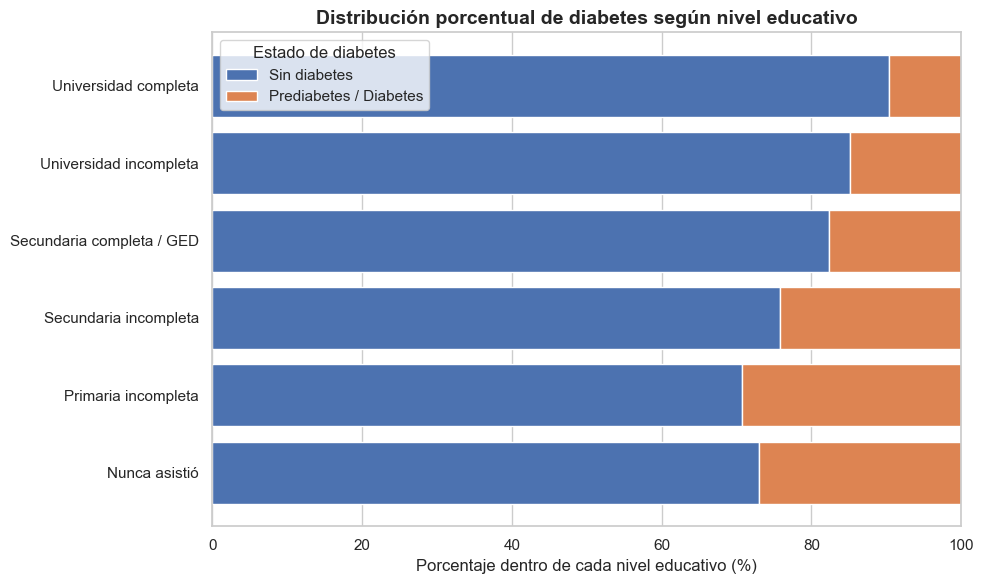

In [ ]:

education_order = [
    "Nunca asistió",
    "Primaria incompleta",
    "Secundaria incompleta",
    "Secundaria completa / GED",
    "Universidad incompleta",
    "Universidad completa"
]

tabla_pct = pd.crosstab(
    df_viz["Education"],
    df_viz["Diabetes_binary"],
    normalize="index"
) * 100

tabla_pct = tabla_pct.reindex(education_order)

no_col = "Sin diabetes"
si_col = "Prediabetes / Diabetes"

sin = tabla_pct[no_col]
con = tabla_pct[si_col]

plt.figure(figsize=(10,6))

plt.barh(education_order, sin, label="Sin diabetes")
plt.barh(education_order, con, left=sin, label="Prediabetes / Diabetes")

plt.title("Distribución porcentual de diabetes según nivel educativo",
          fontsize=14, fontweight="bold")

plt.xlabel("Porcentaje dentro de cada nivel educativo (%)")
plt.xlim(0,100)

plt.legend(title="Estado de diabetes")
plt.tight_layout()
plt.show()

#### **8.2.4 Objetivo vs Income**

In [276]:

income_order = [
    "< $10,000",
    "$10,000–15,000",
    "$15,000–20,000",
    "$20,000–25,000",
    "$25,000–35,000",
    "$35,000–50,000",
    "$50,000–75,000",
    "$75,000+"
]

# Variable ya categórica
inc = df_viz["Income"].astype("category")

# Forzar orden correcto
inc = inc.cat.reorder_categories(income_order, ordered=True)

# Tabla absoluta
tabla_abs = pd.crosstab(inc, df_viz["Diabetes_binary"]).reindex(income_order)

# Totales
total_general = tabla_abs.sum(axis=1)
n_total = total_general.sum()

# % dentro de cada grupo (columna)
tabla_pct_col = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# % del total general
pct_total = (total_general / n_total) * 100

# Nombres de columnas
no_col = "Sin diabetes"
si_col = "Prediabetes / Diabetes"

# Códigos 1–8
codigos = list(range(1, len(income_order) + 1))

# Construir tabla final
tabla_income_final = pd.DataFrame({
    "Código": codigos,
    "Descripción": income_order,
    "Sin diabetes (N)": tabla_abs[no_col].values,
    "Sin diabetes (%)": tabla_pct_col[no_col].round(2).values,
    "Prediabetes/Diabetes (N)": tabla_abs[si_col].values,
    "Prediabetes/Diabetes (%)": tabla_pct_col[si_col].round(2).values,
    "Total (N)": total_general.values,
    "Total (%)": pct_total.round(2).values
})

display(tabla_income_final.style.hide(axis="index"))

Código,Descripción,Sin diabetes (N),Sin diabetes (%),Prediabetes/Diabetes (N),Prediabetes/Diabetes (%),Total (N),Total (%)
1,"< $10,000",7428,3.400000,2383,6.740000,9811,3.870000
2,"$10,000–15,000",8697,3.980000,3086,8.730000,11783,4.640000
3,"$15,000–20,000",12426,5.690000,3568,10.090000,15994,6.300000
4,"$20,000–25,000",16081,7.370000,4054,11.470000,20135,7.940000
5,"$25,000–35,000",21379,9.790000,4504,12.740000,25883,10.200000
6,"$35,000–50,000",31179,14.280000,5291,14.970000,36470,14.380000
7,"$50,000–75,000",37954,17.380000,5265,14.900000,43219,17.040000
8,"$75,000+",83190,38.100000,7195,20.360000,90385,35.630000


In [ ]:

# Tabla de contingencia (N absolutos)
tabla_chi_income = pd.crosstab(
    df_viz["Income"],
    df_viz["Diabetes_binary"]
)

# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_chi_income)

print("Chi-cuadrado:", round(chi2, 2))
print("Grados de libertad:", dof)
print("p-valor:", p)

n = tabla_chi_income.sum().sum()

cramers_v = np.sqrt(chi2 / (n * (min(tabla_chi_income.shape) - 1)))

print("Cramér's V:", round(cramers_v, 3))

Chi-cuadrado: 7003.72
Grados de libertad: 7
p-valor: 0.0
Cramér's V: 0.166


En relación con el ``nivel de ingreso``, la distribución descriptiva evidencia un patrón consistente con un gradiente socioeconómico en la prevalencia de prediabetes/diabetes. Aunque los mayores números absolutos de casos se concentran en los grupos de ingresos medios y altos, debido a su mayor representación dentro de la muestra, al analizar las proporciones se observa que los niveles de ingreso más bajos presentan una mayor carga relativa de enfermedad en comparación con los niveles más altos. Esta tendencia sugiere que a medida que aumenta el ingreso, la proporción de individuos con condición diabética tiende a disminuir. 

La prueba de independencia Chi-cuadrado confirmó que existe una asociación estadísticamente significativa entre nivel de ingreso y estado diabético ``(χ² = 7003.72; gl = 7; p < 0.001)``. Asimismo, el tamaño del efecto medido mediante Cramér’s V ``(V = 0.166)`` indica una asociación de magnitud pequeña a moderada, lo que sugiere que el ingreso constituye un determinante relevante, aunque no exclusivo, en la distribución poblacional de la diabetes. Estos resultados son coherentes con la literatura que identifica el nivel socioeconómico como un determinante estructural de la salud, vinculado a acceso a servicios sanitarios, calidad de la alimentación y oportunidades de actividad física.

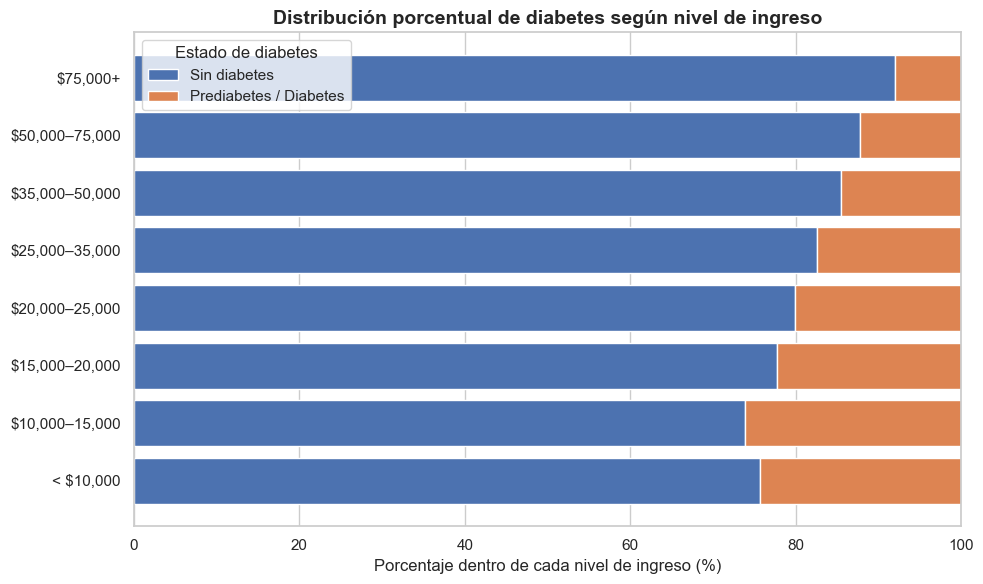

In [ ]:

income_order = [
    "< $10,000",
    "$10,000–15,000",
    "$15,000–20,000",
    "$20,000–25,000",
    "$25,000–35,000",
    "$35,000–50,000",
    "$50,000–75,000",
    "$75,000+"
]

# Tabla porcentual dentro de cada nivel de ingreso
tabla_pct = pd.crosstab(
    df_viz["Income"],
    df_viz["Diabetes_binary"],
    normalize="index"
) * 100

tabla_pct = tabla_pct.reindex(income_order)

no_col = "Sin diabetes"
si_col = "Prediabetes / Diabetes"

sin = tabla_pct[no_col]
con = tabla_pct[si_col]

plt.figure(figsize=(10,6))

plt.barh(income_order, sin, label="Sin diabetes")
plt.barh(income_order, con, left=sin, label="Prediabetes / Diabetes")

plt.title("Distribución porcentual de diabetes según nivel de ingreso",
          fontsize=14, fontweight="bold")

plt.xlabel("Porcentaje dentro de cada nivel de ingreso (%)")
plt.xlim(0, 100)

plt.legend(title="Estado de diabetes")
plt.tight_layout()
plt.show()

### **8.3 Variable objetivo vs variables numéricas**

Con el fin de evaluar la relación entre el estado de prediabetes/diabetes y las variables numéricas del estudio (BMI, MentHlth y PhysHlth), se realizó un análisis bivariado orientado a comparar la distribución y las medias de dichas variables entre los dos grupos definidos por la variable objetivo: Prediabetes/Diabetes y Sin diabetes.

Dado que la variable dependiente es categórica binaria y las variables explicativas son continuas, el análisis se estructuró a partir de la comparación de medias entre grupos independientes. Para ello, se utilizó la prueba t de Welch, la cual no asume igualdad de varianzas entre grupos y resulta apropiada en contextos donde los tamaños muestrales son desiguales.

Si bien algunas de las variables presentan asimetría en su distribución, el tamaño muestral elevado garantiza la robustez de la prueba t por efecto del Teorema del Límite Central, el cual establece que la distribución de la media muestral tiende a aproximarse a la normalidad cuando el número de observaciones es grande.

Adicionalmente, para complementar la significancia estadística, se calculó el tamaño del efecto mediante el estadístico Cohen’s d, con el objetivo de evaluar la magnitud práctica de las diferencias observadas entre grupos. Esta medida permite distinguir entre diferencias estadísticamente significativas y diferencias clínicamente relevantes.

Finalmente, el análisis se apoyó en representaciones gráficas (boxplots y curvas de densidad) que permiten visualizar la dispersión, la presencia de valores atípicos y la forma de la distribución en cada grupo, proporcionando una comprensión más completa del comportamiento de las variables numéricas según el estado diabético.m

#### **8.3.1 Objetivo vs BMI**

In [206]:
def tabla_descriptiva(var):

    resumen = (
        df_viz
        .groupby("Diabetes_binary")[var]
        .agg([
            "count",
            "mean",
            "median",
            "std",
            "min",
            lambda x: x.quantile(0.25),
            lambda x: x.quantile(0.75),
            "max"
        ])
    )

    resumen.columns = [
        "N",
        "Media",
        "Mediana",
        "Desv. Estándar",
        "Mínimo",
        "Q1 (25%)",
        "Q3 (75%)",
        "Máximo"
    ]

    return resumen.round(2)

tabla_descriptiva("BMI")

,N,Media,Mediana,Desv. Estándar,Mínimo,Q1 (25%),Q3 (75%),Máximo
Diabetes_binary,,,,,,,,
Prediabetes / Diabetes,35346,31.94,31.0,7.36,13.0,27.0,35.0,98.0
Sin diabetes,218334,27.81,27.0,6.29,12.0,24.0,31.0,98.0


In [207]:
import scipy.stats as stats
import numpy as np

grupo1 = df_viz[df_viz["Diabetes_binary"]=="Prediabetes / Diabetes"]["BMI"]
grupo0 = df_viz[df_viz["Diabetes_binary"]=="Sin diabetes"]["BMI"]

t_stat, p_val = stats.ttest_ind(grupo1, grupo0, equal_var=False)

pooled_sd = np.sqrt((grupo1.std()**2 + grupo0.std()**2)/2)
cohens_d = (grupo1.mean() - grupo0.mean())/pooled_sd

print("t:", round(t_stat,2))
print("p-valor:", p_val)
print("Cohen's d:", round(cohens_d,2))

t: 99.92
p-valor: 0.0
Cohen's d: 0.6


El índice de masa corporal `(BMI)` es mayor en el grupo con Prediabetes / Diabetes (Media = 31.94; Mediana = 31) en comparación con el grupo Sin diabetes (Media = 27.81; Mediana = 27). Además, los cuartiles muestran que toda la distribución del grupo diabético está desplazada hacia valores más altos.

La prueba t de Welch arroja un estadístico `t = 99.92` con p < 0.001, lo que indica que la diferencia de medias es estadísticamente significativa.

El tamaño del efecto ``(Cohen’s d = 0.60)`` sugiere una diferencia de magnitud moderada, lo que implica que la asociación no solo es significativa por el gran tamaño muestral, sino también relevante desde el punto de vista práctico.

En consecuencia, el BMI presenta una diferencia clara y sustantiva entre ambos grupos, consolidándose como una variable fuertemente asociada al estado diabético.

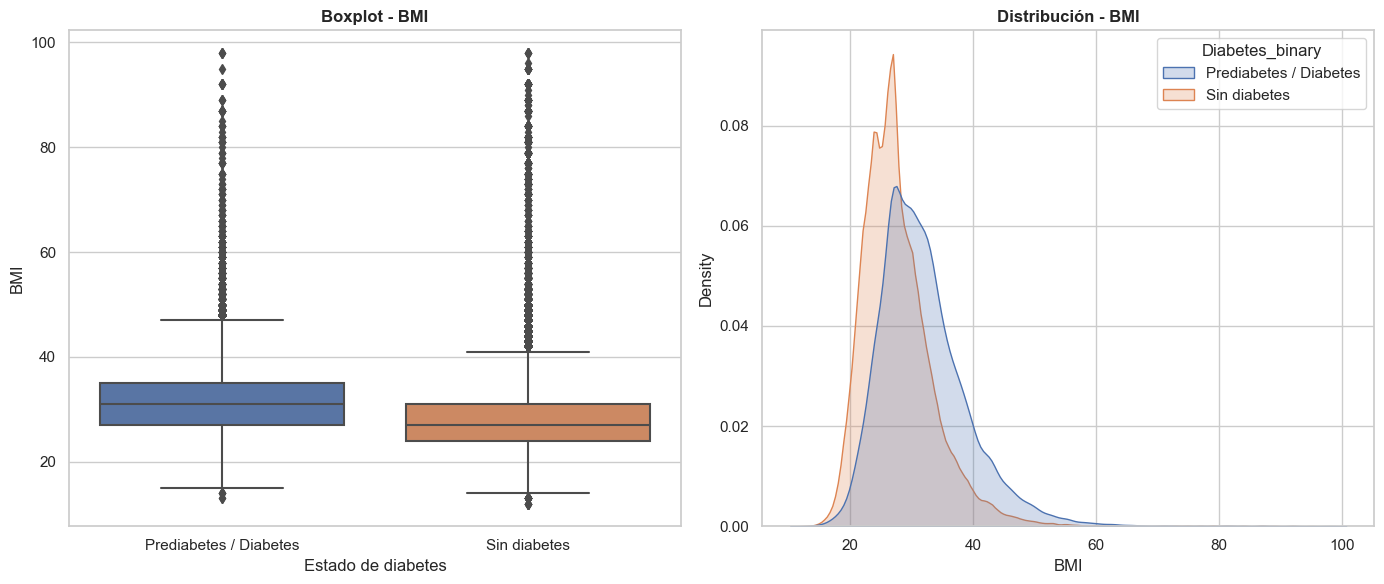

In [208]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# -------- Boxplot --------
sns.boxplot(
    data=df_viz,
    x="Diabetes_binary",
    y="BMI",
    ax=axes[0]
)

axes[0].set_title("Boxplot - BMI", fontweight="bold")
axes[0].set_xlabel("Estado de diabetes")
axes[0].set_ylabel("BMI")

# -------- Distribución --------
sns.kdeplot(
    data=df_viz,
    x="BMI",
    hue="Diabetes_binary",
    fill=True,
    common_norm=False,
    ax=axes[1]
)

axes[1].set_title("Distribución - BMI", fontweight="bold")
axes[1].set_xlabel("BMI")

plt.tight_layout()
plt.show()

El boxplot muestra que el grupo con Prediabetes / Diabetes presenta una mediana de BMI claramente superior al grupo Sin diabetes. Además: el rango intercuartílico (Q1–Q3) está desplazado hacia valores más altos; se observa también mayor concentración de valores elevados. Ambos grupos presentan outliers altos, pero en el grupo diabético la distribución central ya se encuentra en un rango de sobrepeso/obesidad. Esto indica una diferencia estructural en la distribución, no solo en valores extremos.

La curva de densidad confirma visualmente el desplazamiento hacia la derecha del grupo con Prediabetes / Diabetes. La distribución azul (diabéticos) está centrada en valores más altos. Existe solapamiento entre grupos, pero el pico principal del grupo diabético se ubica aproximadamente 3–4 puntos de BMI por encima. De igual forma, se observa una cola derecha más pronunciada en el grupo diabético, indicando mayor proporción de IMC elevados.

Ambos gráficos evidencian que el BMI no solo difiere en promedio, sino que toda la distribución del grupo con prediabetes/diabetes está desplazada hacia valores mayores. Esto refuerza la evidencia estadística previa (t-test y Cohen’s d) y confirma que el BMI es una variable fuertemente asociada al estado diabético tanto en términos estadísticos como clínicos.

#### **8.3.2 Objetivo vs MentHlth**

In [209]:
tabla_descriptiva("MentHlth")

,N,Media,Mediana,Desv. Estándar,Mínimo,Q1 (25%),Q3 (75%),Máximo
Diabetes_binary,,,,,,,,
Prediabetes / Diabetes,35346,4.46,0.0,8.95,0.0,0.0,3.0,30.0
Sin diabetes,218334,2.98,0.0,7.11,0.0,0.0,2.0,30.0


In [210]:
grupo1 = df_viz[df_viz["Diabetes_binary"]=="Prediabetes / Diabetes"]["MentHlth"]
grupo0 = df_viz[df_viz["Diabetes_binary"]=="Sin diabetes"]["MentHlth"]

t_stat, p_val = stats.ttest_ind(grupo1, grupo0, equal_var=False)

pooled_sd = np.sqrt((grupo1.std()**2 + grupo0.std()**2)/2)
cohens_d = (grupo1.mean() - grupo0.mean())/pooled_sd

print("t:", round(t_stat,2))
print("p-valor:", p_val)
print("Cohen's d:", round(cohens_d,2))

t: 29.69
p-valor: 7.929124395108997e-192
Cohen's d: 0.18


El número promedio de días con ``mala salud mental`` en los últimos 30 días es mayor en el grupo con Prediabetes / Diabetes (Media = 4.46) en comparación con el grupo Sin diabetes (Media = 2.98). Sin embargo, la mediana en ambos grupos es 0 días, lo que indica que más de la mitad de los individuos en cada grupo no reportó días de mala salud mental, evidenciando una distribución fuertemente asimétrica hacia la derecha.

Desde el punto de vista estadístico, la prueba t arroja ``t = 29.69`` con p < 0.001, lo que indica que la diferencia de medias es estadísticamente significativa. No obstante, el tamaño del efecto es pequeño ``(Cohen’s d = 0.18)``, lo que sugiere que, aunque la diferencia existe y es estadísticamente robusta (probablemente influenciada por el gran tamaño muestral), la magnitud práctica de la diferencia entre grupos es baja.

En conclusión, existe una asociación estadísticamente significativa entre salud mental y estado diabético, pero su impacto en términos de magnitud es limitado.

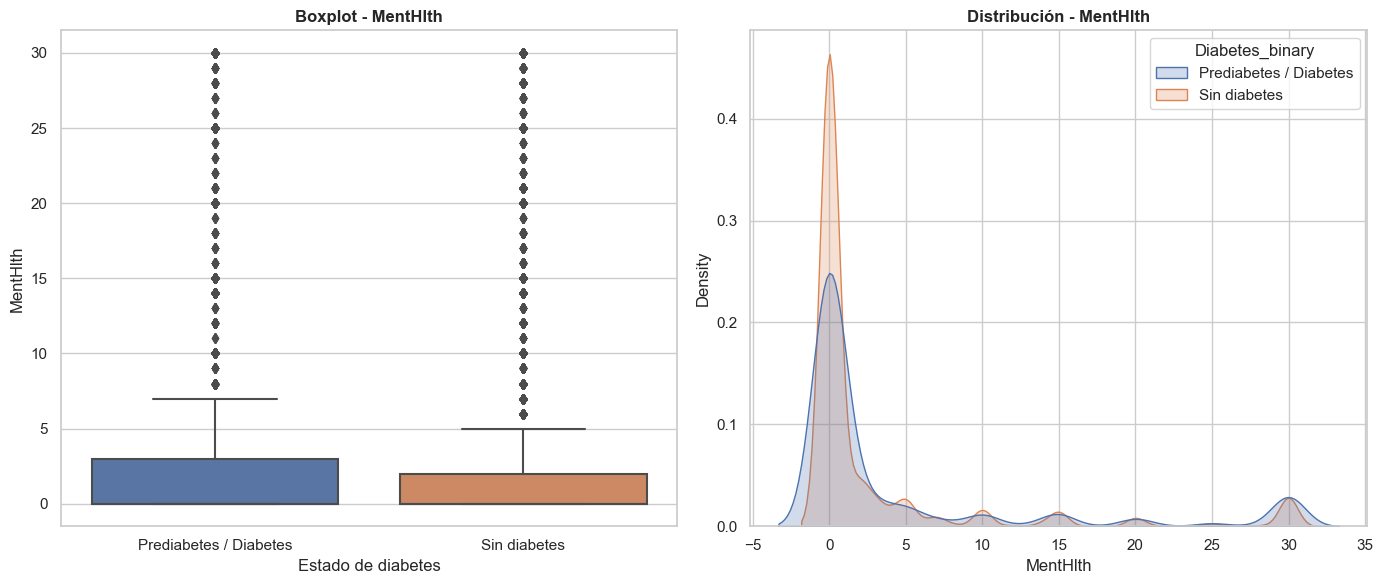

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# -------- Boxplot --------
sns.boxplot(
    data=df_viz,
    x="Diabetes_binary",
    y="MentHlth",
    ax=axes[0]
)

axes[0].set_title("Boxplot - MentHlth", fontweight="bold")
axes[0].set_xlabel("Estado de diabetes")
axes[0].set_ylabel("MentHlth")

# -------- Distribución --------
sns.kdeplot(
    data=df_viz,
    x="MentHlth",
    hue="Diabetes_binary",
    fill=True,
    common_norm=False,
    ax=axes[1]
)

axes[1].set_title("Distribución - MentHlth", fontweight="bold")
axes[1].set_xlabel("MentHlth")

plt.tight_layout()
plt.show()

Las gráficas muestran que la mayoría de las personas en ambos grupos reporta 0 días de mala salud mental, lo que explica que la mediana sea 0 y que la distribución esté fuertemente concentrada en ese valor. Sin embargo, el grupo con Prediabetes / Diabetes presenta una ligera mayor dispersión y una cola derecha más extendida, reflejando que una proporción mayor acumula más días con afectación mental.

El boxplot confirma que, aunque las diferencias centrales no son muy amplias, el grupo diabético tiene un rango intercuartílico ligeramente superior y mayor presencia de valores altos. La curva de densidad muestra un desplazamiento leve hacia la derecha en este grupo, pero con amplio solapamiento entre distribuciones.

En conjunto, visualmente se aprecia una diferencia existente pero pequeña en magnitud, coherente con el tamaño de efecto bajo observado en el análisis estadístico.m

#### **8.3m.3 Objetivo vs PhysHlth**

In [212]:
tabla_descriptiva("PhysHlth")

,N,Media,Mediana,Desv. Estándar,Mínimo,Q1 (25%),Q3 (75%),Máximo
Diabetes_binary,,,,,,,,
Prediabetes / Diabetes,35346,7.95,1.0,11.30,0.0,0.0,15.0,30.0
Sin diabetes,218334,3.64,0.0,8.06,0.0,0.0,2.0,30.0


In [213]:
grupo1 = df_viz[df_viz["Diabetes_binary"]=="Prediabetes / Diabetes"]["PhysHlth"]
grupo0 = df_viz[df_viz["Diabetes_binary"]=="Sin diabetes"]["PhysHlth"]

t_stat, p_val = stats.ttest_ind(grupo1, grupo0, equal_var=False)

pooled_sd = np.sqrt((grupo1.std()**2 + grupo0.std()**2)/2)
cohens_d = (grupo1.mean() - grupo0.mean())/pooled_sd

print("t:", round(t_stat,2))
print("p-valor:", p_val)
print("Cohen's d:", round(cohens_d,2))

t: 68.97
p-valor: 0.0
Cohen's d: 0.44


El número promedio de días con ``mala salud física`` en los últimos 30 días es considerablemente mayor en el grupo con Prediabetes / Diabetes (Media = 7.95; Mediana = 1) frente al grupo Sin diabetes (Media = 3.64; Mediana = 0). Además, el tercer cuartil es mucho más alto en el grupo diabético (Q3 = 15 vs 2), lo que indica que una proporción importante reporta múltiples días con afectación física.

La prueba t de Welch arroja ``t = 68.97`` con p < 0.001, evidenciando una diferencia estadísticamente significativa entre grupos. El tamaño del efecto ``(Cohen’s d = 0.44)`` es moderado, lo que sugiere que la diferencia no solo es significativa por el gran tamaño muestral, sino también relevante en términos prácticos.

En conjunto, la mala salud física muestra una asociación clara y sustantiva con el estado diabético, con una magnitud mayor que la observada previamente para salud mental.

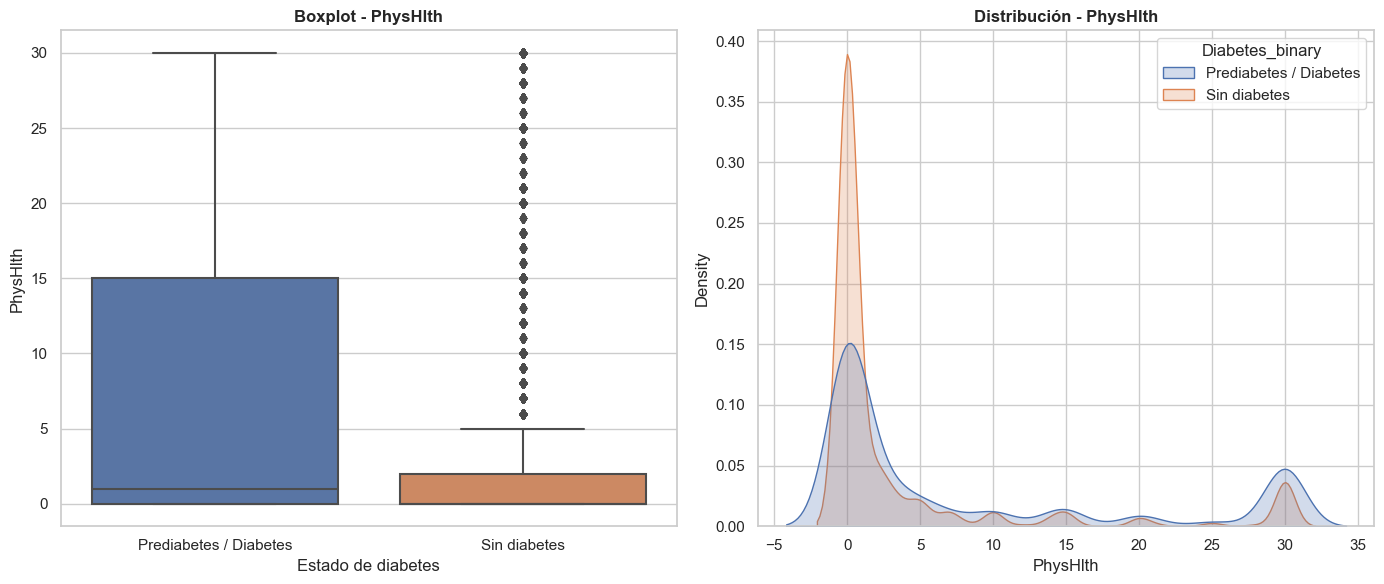

In [214]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# -------- Boxplot --------
sns.boxplot(
    data=df_viz,
    x="Diabetes_binary",
    y="PhysHlth",
    ax=axes[0]
)

axes[0].set_title("Boxplot - PhysHlth", fontweight="bold")
axes[0].set_xlabel("Estado de diabetes")
axes[0].set_ylabel("PhysHlth")

# -------- Distribución --------
sns.kdeplot(
    data=df_viz,
    x="PhysHlth",
    hue="Diabetes_binary",
    fill=True,
    common_norm=False,
    ax=axes[1]
)

axes[1].set_title("Distribución - PhysHlth", fontweight="bold")
axes[1].set_xlabel("PhysHlth")

plt.tight_layout()
plt.show()

Las gráficas muestran una diferencia más marcada que en salud mental. Aunque en ambos grupos la mediana se mantiene cerca de 0 días, el boxplot evidencia que el grupo con Prediabetes / Diabetes tiene un rango intercuartílico mucho más amplio y valores centrales más elevados. El tercer cuartil alcanza 15 días en el grupo diabético frente a solo 2 días en el grupo sin diabetes, lo que indica que una proporción considerable reporta múltiples días con mala salud física.

La distribución confirma este patrón: la curva del grupo diabético está más extendida hacia la derecha y presenta una cola más pesada, reflejando mayor frecuencia de valores altos (incluyendo el límite de 30 días). Aunque existe solapamiento entre grupos, el desplazamiento es visualmente claro.

En conjunto, las gráficas refuerzan que la afectación física es sustancialmente mayor en personas con prediabetes/diabetes, coherente con el tamaño de efecto moderado observado en el análisis estadístico.

## **9. Análisis de correlación entre la variable objetivo y factores asociados**

In [ ]:


df_corr = pd.DataFrame()

# Variable objetivo → 0/1
df_corr["Diabetes"] = df_viz["Diabetes_binary"].map({
    "Sin diabetes": 0,
    "Prediabetes / Diabetes": 1
})

# Continuas
df_corr["BMI"] = df_viz["BMI"]
df_corr["MentHlth"] = df_viz["MentHlth"]
df_corr["PhysHlth"] = df_viz["PhysHlth"]

# Ordinales (usar códigos de categoría)
df_corr["GenHlth"] = df_viz["GenHlth"].cat.codes + 1
df_corr["Education"] = df_viz["Education"].cat.codes + 1
df_corr["Income"] = df_viz["Income"].cat.codes + 1
df_corr["Age"] = df_viz["Age"].cat.codes + 1

# Eliminar filas con NA
df_corr = df_corr.dropna()

In [283]:
corr_matrix = df_corr.corr(method="spearman")

corr_matrix.round(2)

,Diabetes,BMI,MentHlth,PhysHlth,GenHlth,Education,Income,Age
Diabetes,1.00,0.23,0.04,0.16,0.29,-0.12,-0.16,0.18
BMI,0.23,1.00,0.05,0.12,0.26,-0.12,-0.09,-0.02
MentHlth,0.04,0.05,1.00,0.31,0.24,-0.05,-0.15,-0.16
PhysHlth,0.16,0.12,0.31,1.00,0.45,-0.11,-0.22,0.05
GenHlth,0.29,0.26,0.24,0.45,1.00,-0.28,-0.35,0.15
Education,-0.12,-0.12,-0.05,-0.11,-0.28,1.00,0.45,-0.10
Income,-0.16,-0.09,-0.15,-0.22,-0.35,0.45,1.00,-0.18
Age,0.18,-0.02,-0.16,0.05,0.15,-0.10,-0.18,1.00


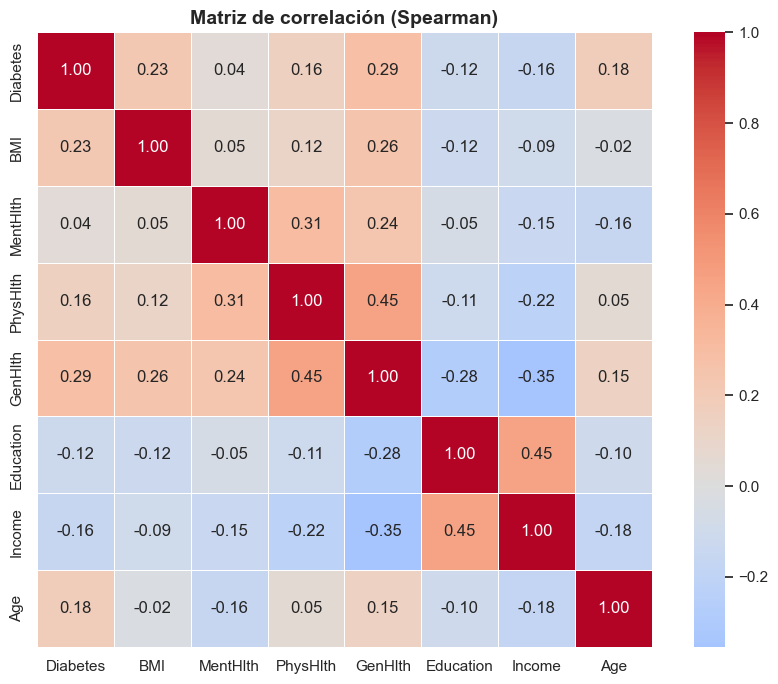

In [ ]:


plt.figure(figsize=(9,7))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Matriz de correlación (Spearman)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

La matriz de correlación de Spearman evidencia asociaciones monotónicas coherentes con la literatura epidemiológica. El estado diabético presenta una correlación positiva con el índice de masa corporal (ρ=0.23), la edad (ρ=0.18) y la salud general autopercibida (ρ=0.29), indicando que peores condiciones físicas y mayor edad se asocian con mayor prevalencia de diabetes. Asimismo, se observan correlaciones negativas con el nivel educativo (ρ=-0.12) y el ingreso (ρ=-0.16), lo cual sugiere un gradiente socioeconómico en la distribución de la enfermedad. No se identificaron problemas severos de multicolinealidad entre variables explicativas.